Exploratory Data Analysis

In [82]:
# House Priced Induction EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datasetTrain = pd.read_csv("train.csv")
datasetTrain
dataset_Test = pd.read_csv("test.csv")

#inData analaysis, We analysis to find the below stuff:
1. Missing Values
2. Numerical Variables
3. Distribution of numerical values
4. Categorical Fetaures
5. Outliers
6. Relationship between independent and dependent features

In [83]:
## Missing Values
datasetTrain.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [84]:
# To get the Null values in columns
dataset_Test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [85]:
# Features List (Columns)##:
[features for features in dataset_Test.columns]

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [86]:
## Fetaures with Null Value greater and equal to 1
features_With_Nan = [features for features in dataset_Test.columns if dataset_Test[features].isnull().sum()>=1]
features_With_Nan

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [87]:
#Percentage of Nan Values

#Means of Eelctrical Fetaures
print(datasetTrain["Electrical"].isnull().sum())
print(datasetTrain["Electrical"].isnull().mean())

1
0.0006849315068493151


In [88]:
## To get Nan Values of columns
for features in features_With_Nan:
    print(features, datasetTrain[features].isnull().sum(),'missing values')
    print(features, np.round(datasetTrain[features].isnull().mean(),4)*100,'% missing values')

MSZoning 0 missing values
MSZoning 0.0 % missing values
LotFrontage 259 missing values
LotFrontage 17.740000000000002 % missing values
Alley 1369 missing values
Alley 93.77 % missing values
Utilities 0 missing values
Utilities 0.0 % missing values
Exterior1st 0 missing values
Exterior1st 0.0 % missing values
Exterior2nd 0 missing values
Exterior2nd 0.0 % missing values
MasVnrType 872 missing values
MasVnrType 59.730000000000004 % missing values
MasVnrArea 8 missing values
MasVnrArea 0.5499999999999999 % missing values
BsmtQual 37 missing values
BsmtQual 2.53 % missing values
BsmtCond 37 missing values
BsmtCond 2.53 % missing values
BsmtExposure 38 missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 37 missing values
BsmtFinType1 2.53 % missing values
BsmtFinSF1 0 missing values
BsmtFinSF1 0.0 % missing values
BsmtFinType2 38 missing values
BsmtFinType2 2.6 % missing values
BsmtFinSF2 0 missing values
BsmtFinSF2 0.0 % missing values
BsmtUnfSF 0 missing values
BsmtUnfSF 0.0 % m

<Axes: ylabel='SalePrice'>

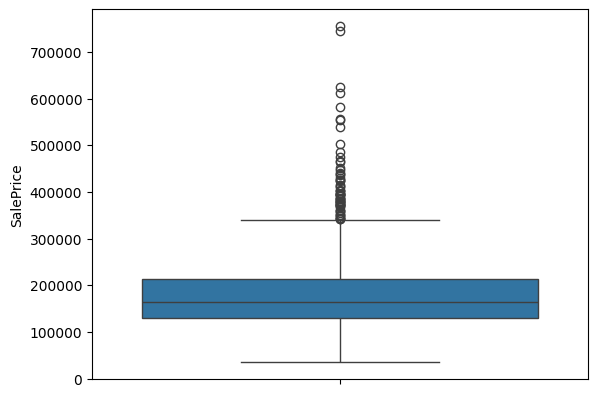

In [89]:
## Check if Data have Outlier
import seaborn as sns
sns.boxplot(datasetTrain['SalePrice'])

In [90]:
#Get the describe value
datasetTrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [91]:
# Analysis of Null Values Variable impacts on Sale Price Columns
datasetCopy = datasetTrain.copy()
for feature in features_With_Nan:
    datasetCopy[feature] = np.where(datasetCopy[feature].isnull(),1,0)

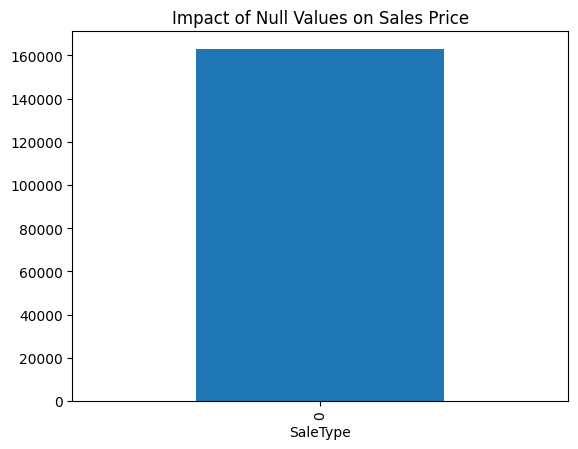

In [92]:
# Calculate the mediam of Sale Price  where information is missing or present because saleprice has outlier
datasetCopy.groupby(feature)['SalePrice'].median().plot.bar() # To avoid outlier
plt.title('Impact of Null Values on Sales Price')
plt.show()

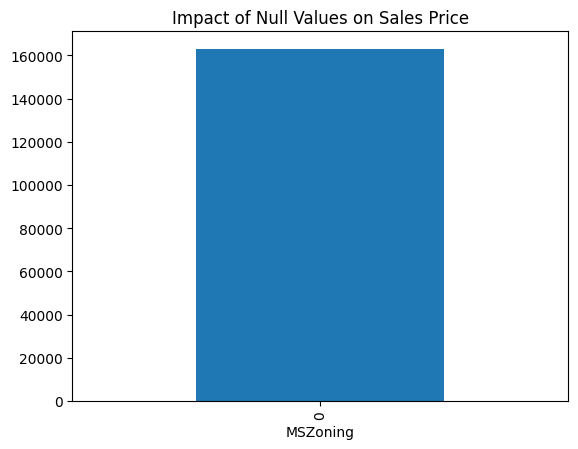

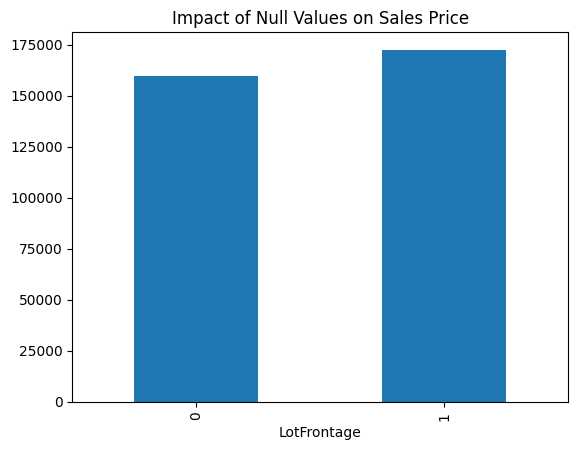

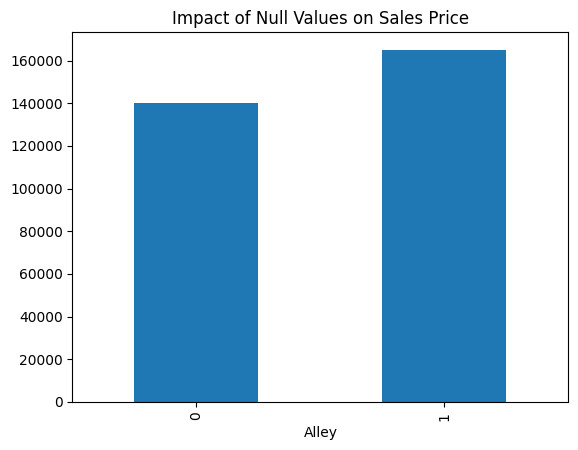

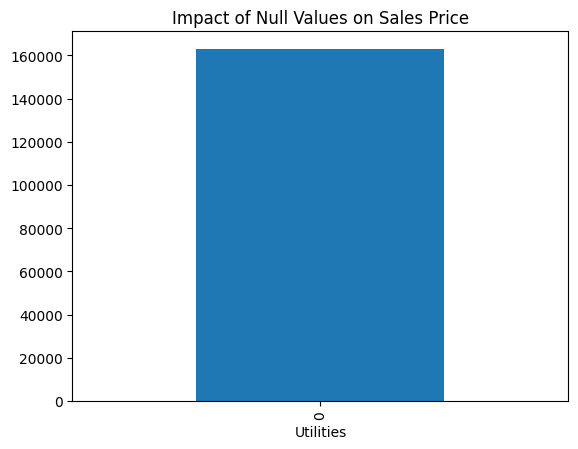

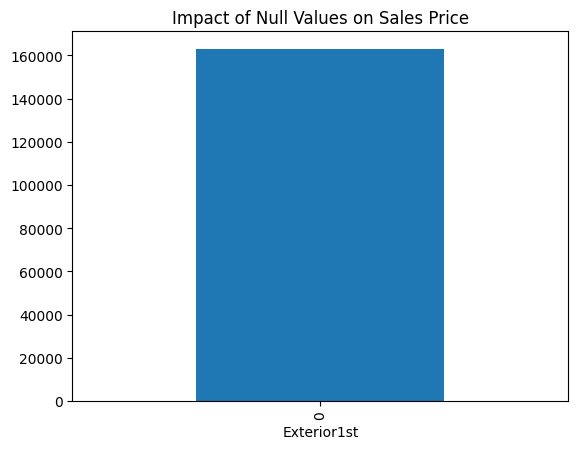

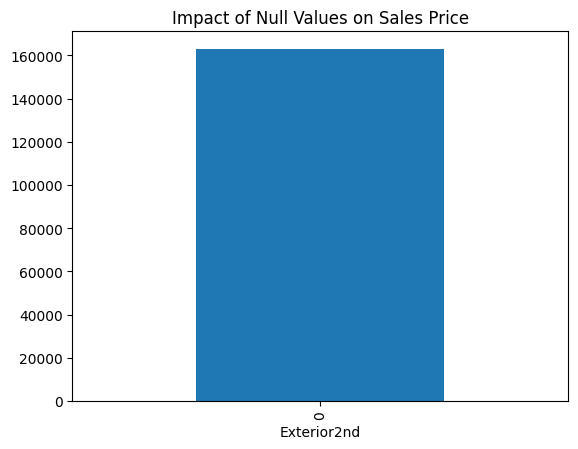

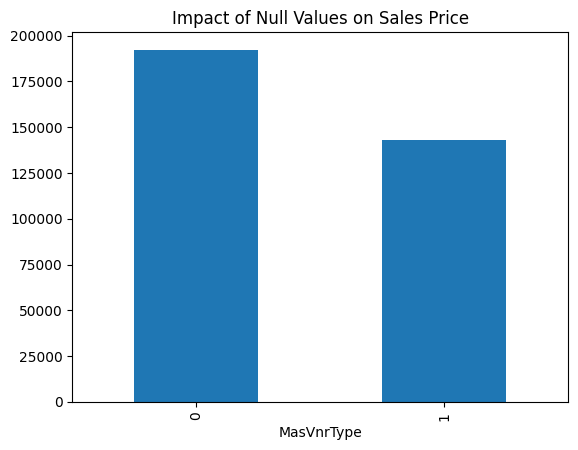

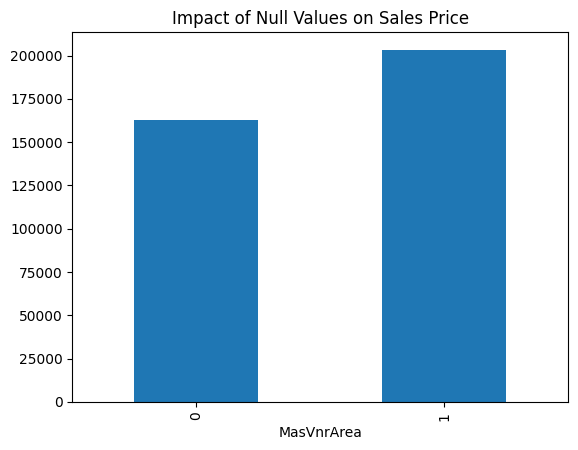

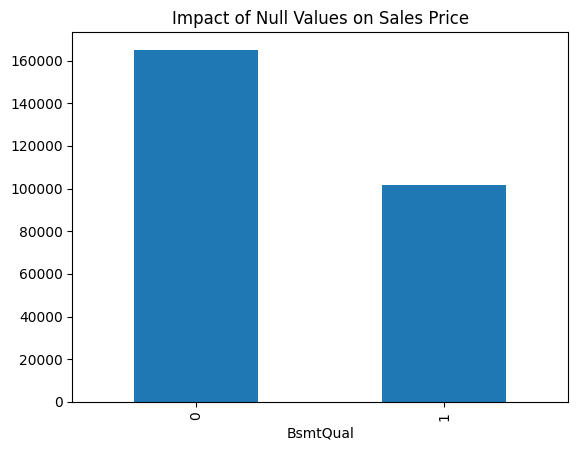

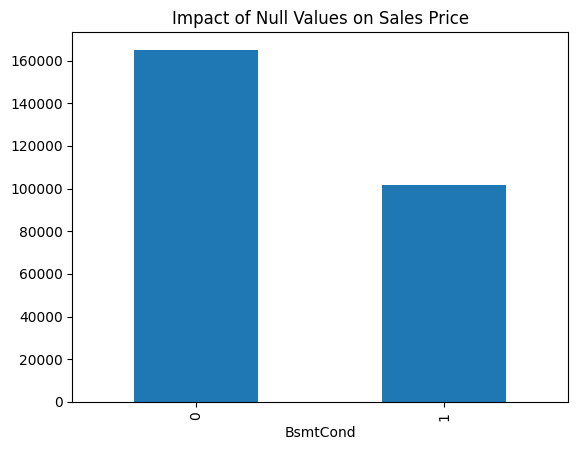

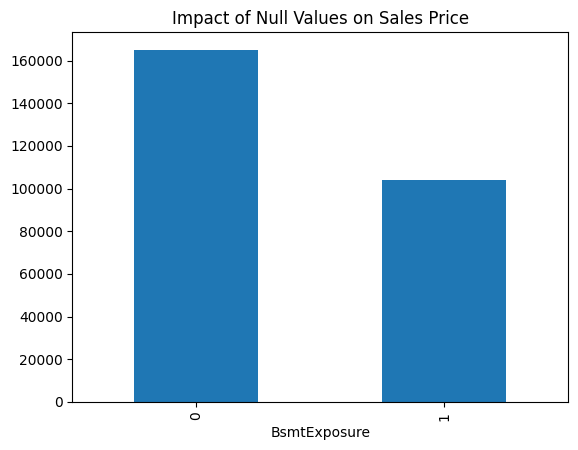

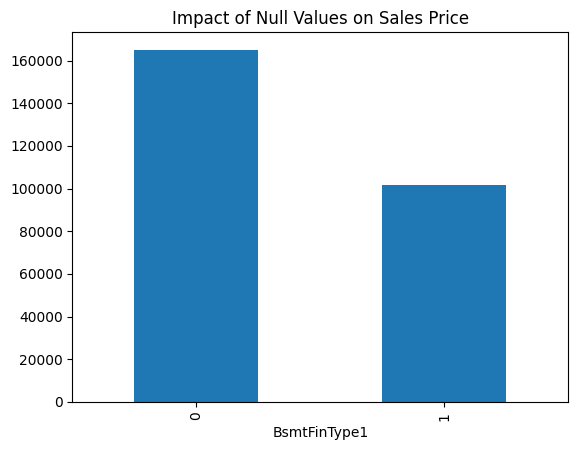

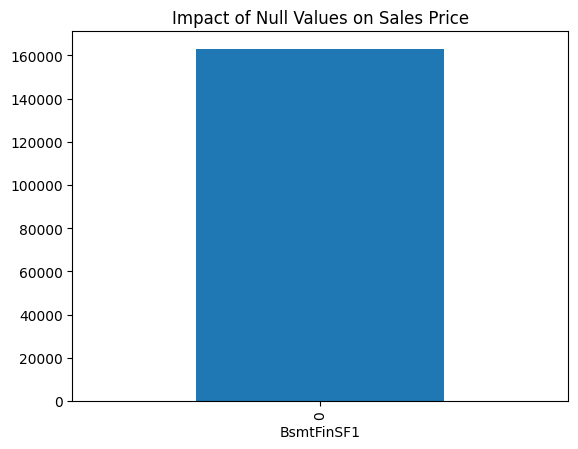

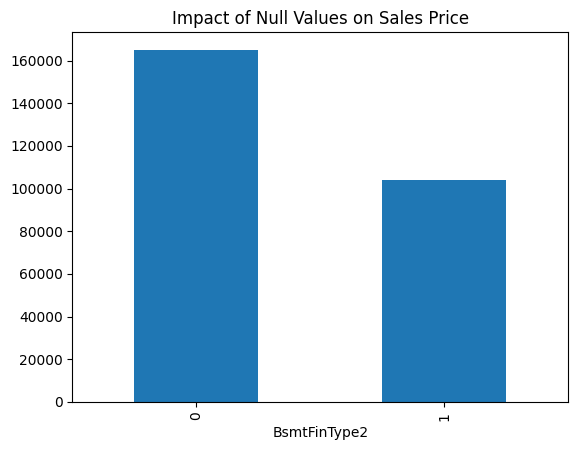

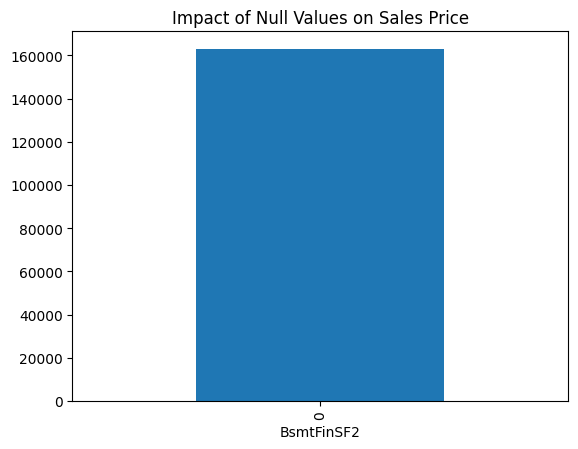

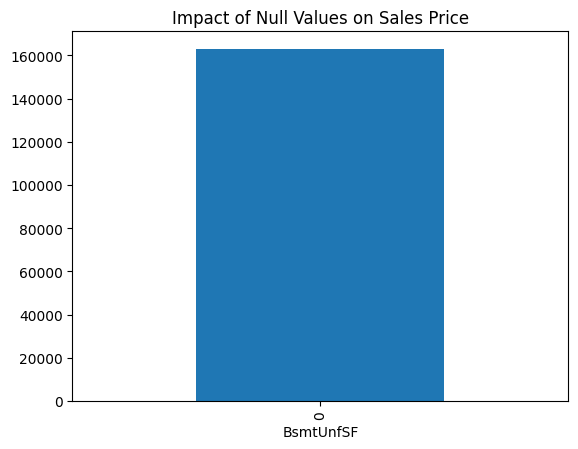

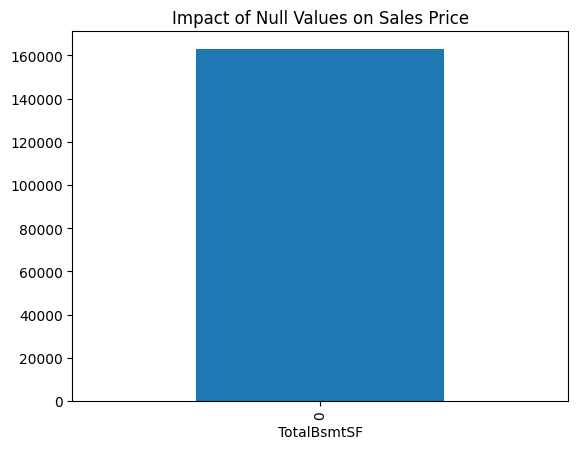

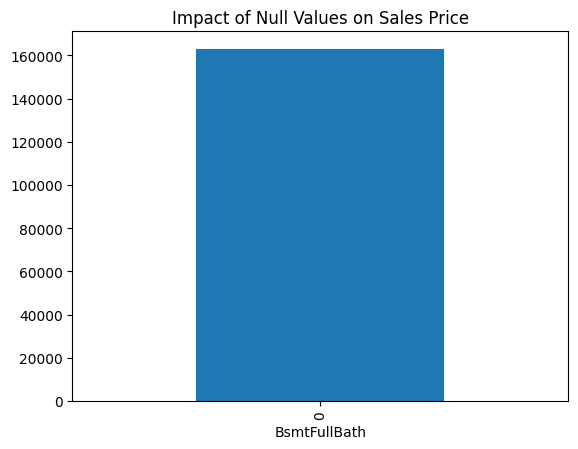

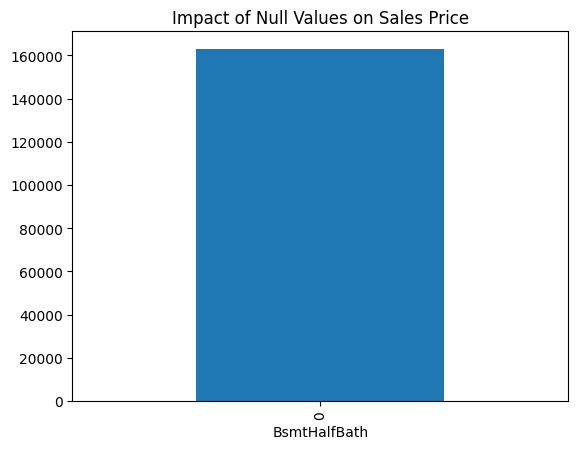

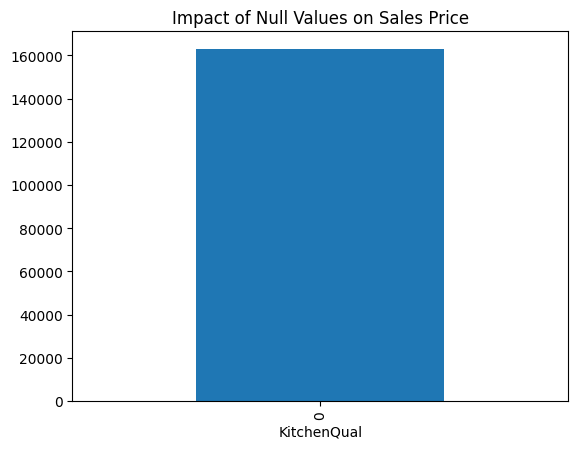

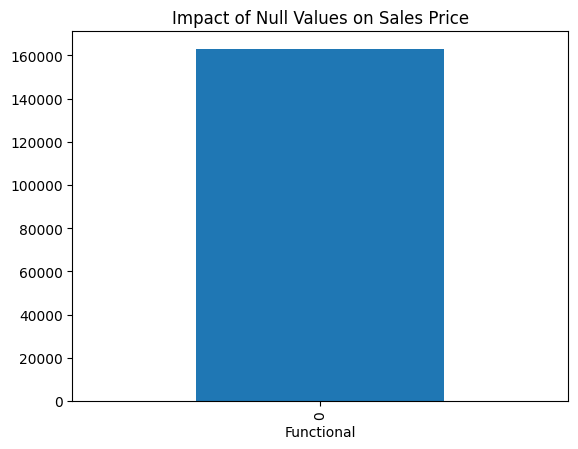

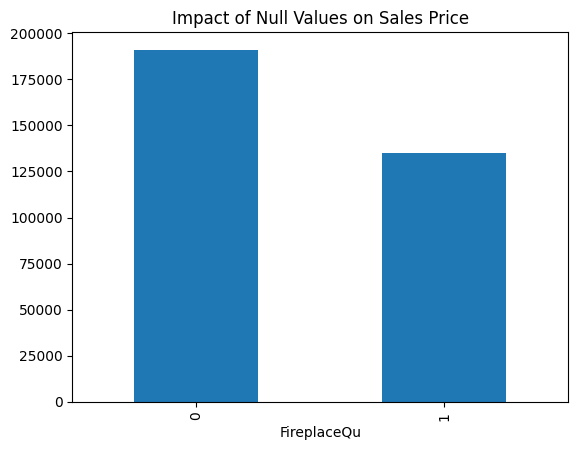

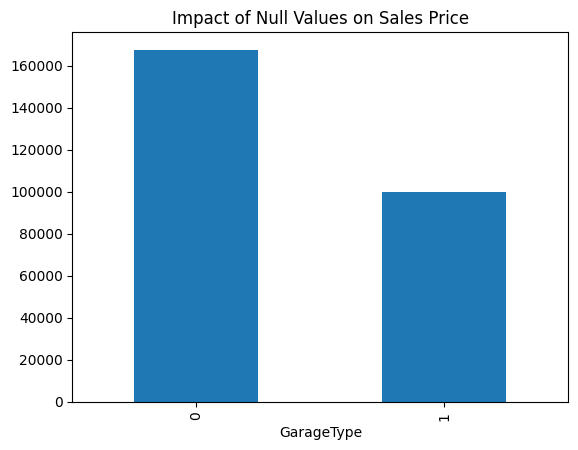

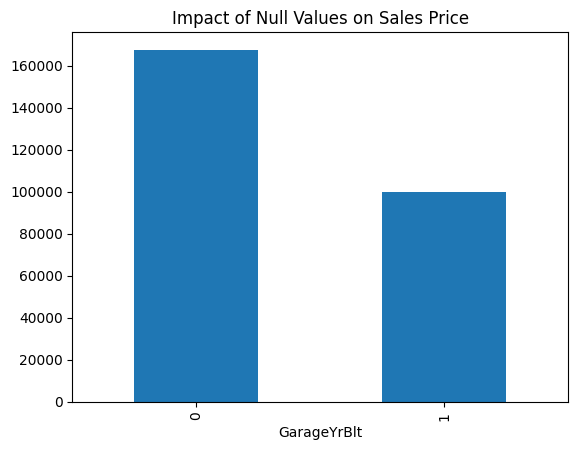

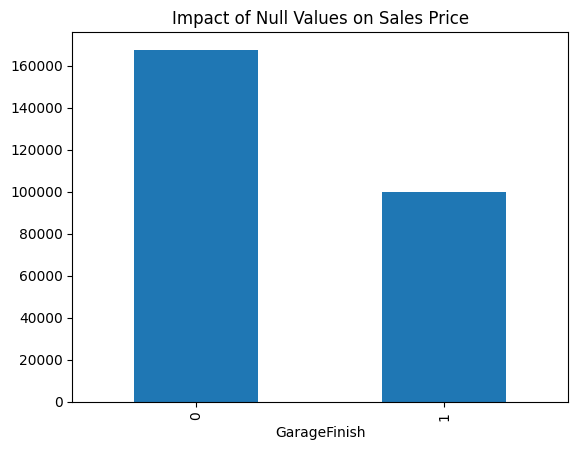

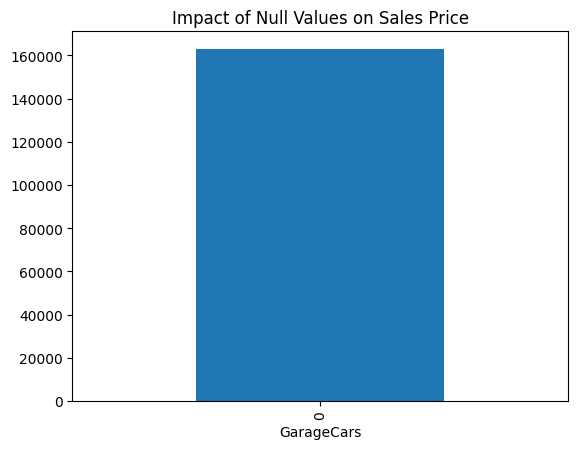

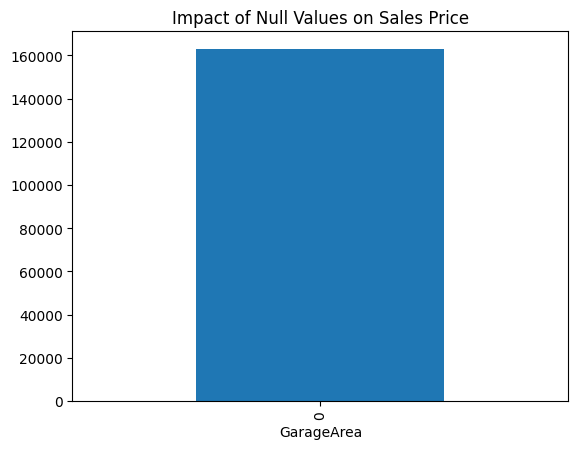

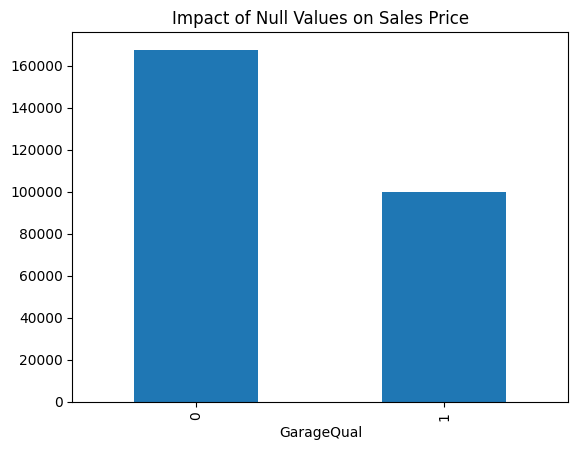

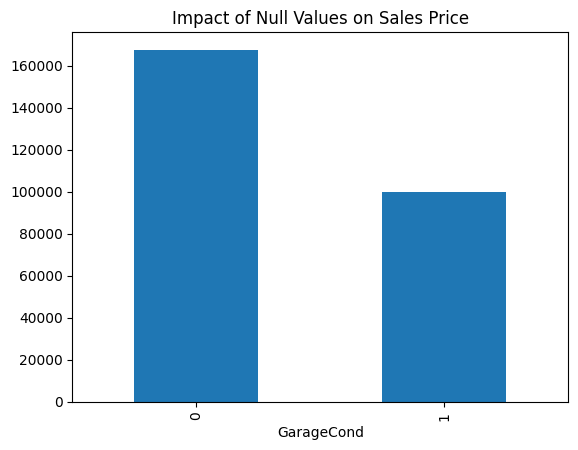

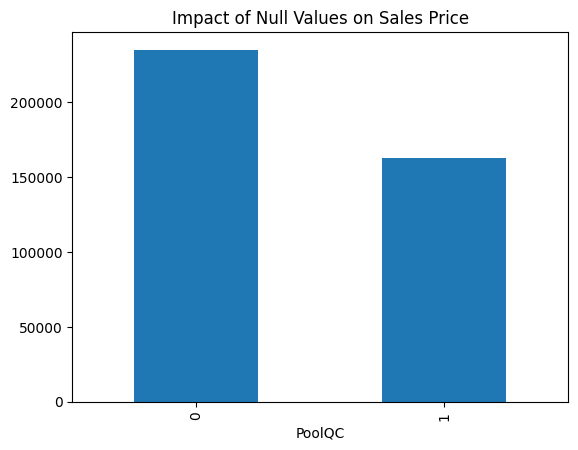

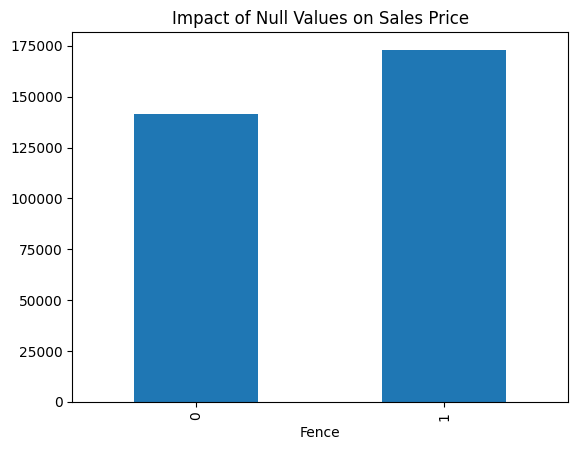

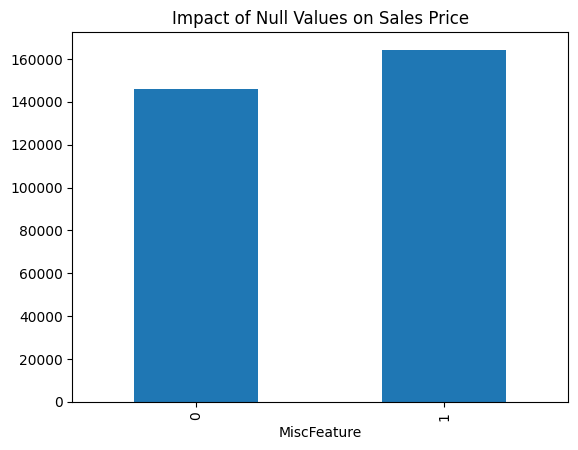

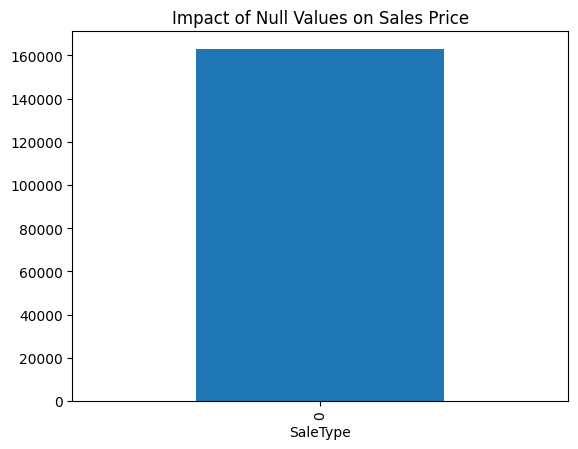

In [93]:
## To check the impact of Null Values on sales Price
datasetCopy = datasetTrain.copy()
for feature in features_With_Nan:
    datasetCopy[feature] = np.where(datasetCopy[feature].isnull(),1,0)
    datasetCopy.groupby(feature)['SalePrice'].median().plot.bar() # To avoid outlier
    plt.title('Impact of Null Values on Sales Price')
    plt.show()
    

# Here Relationship between the missing values and target variables is clearly visible. So, we can replace Nan values with some meaningful information which will do in feature engeniring section

Numerical Variables

In [94]:
# List of numerical variables
datasetTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
## To check the values any values in Sales Price is Obejct
datasetTrain['SalePrice'].dtypes!= 'O' ##  true , which means all are numerical values

True

In [96]:
datasetTrain['SalePrice']== 'O' ## All False means all are Numerical

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool

In [97]:
# list of features that are numericals that is not object
numerical_Feature = [feature for feature in datasetTrain.columns if datasetTrain[feature].dtype!='object']
print(len(numerical_Feature))



38


In [98]:
datasetTrain[numerical_Feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [99]:
## Temporal Variables (Date time Variables)
year_feature = [feature for feature in numerical_Feature if 'Year' in feature or 'Yr' in feature]
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [100]:
for feature in year_feature:
    print(feature, datasetTrain[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0, 0.5, 'House Price vs Year Sold')

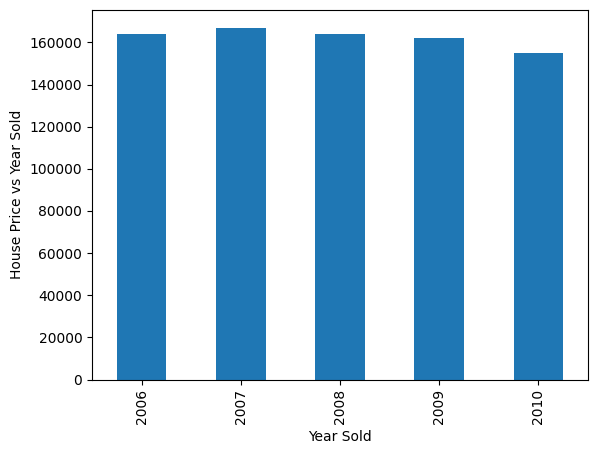

In [101]:
datasetTrain.groupby('YrSold')['SalePrice'].median().plot.bar()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.ylabel('House Price vs Year Sold')

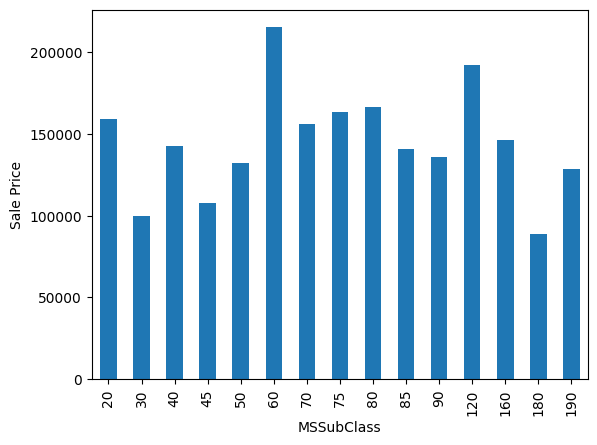

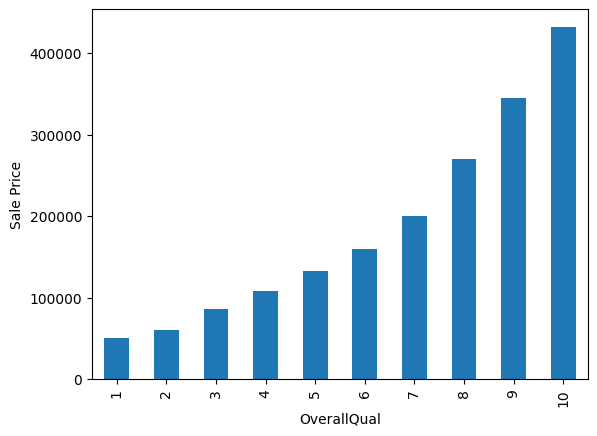

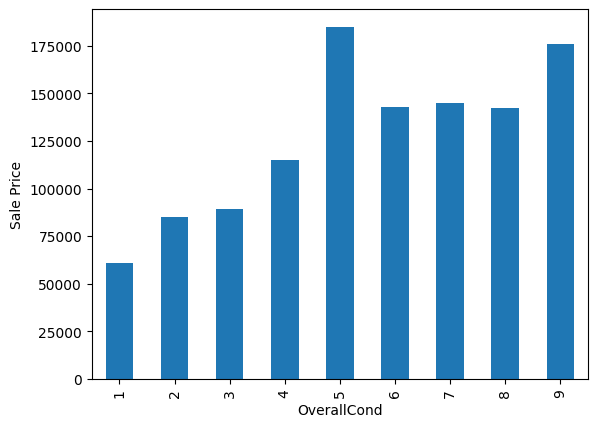

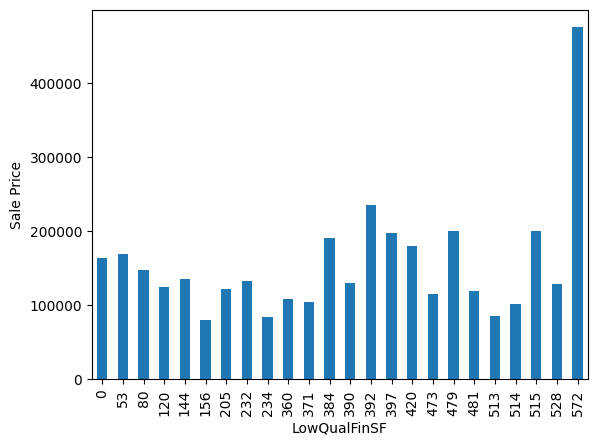

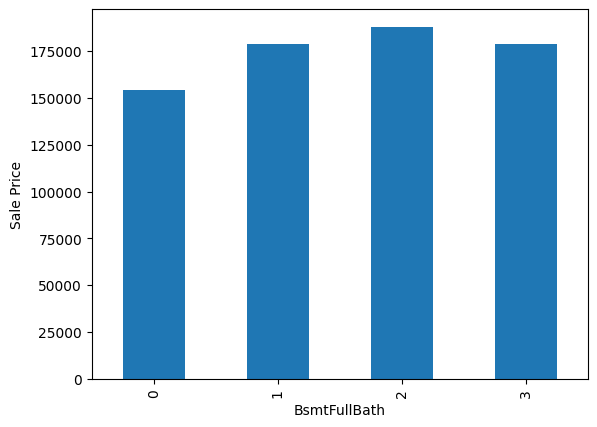

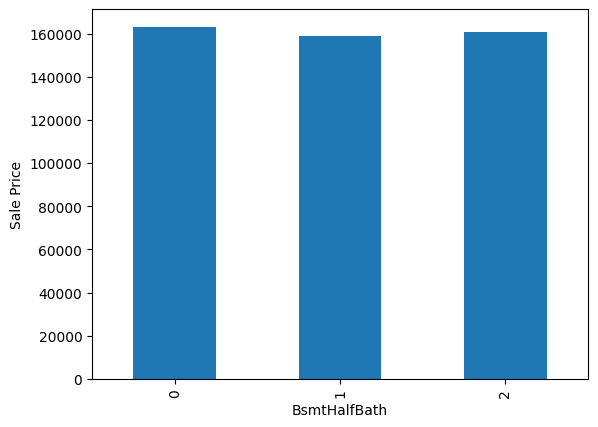

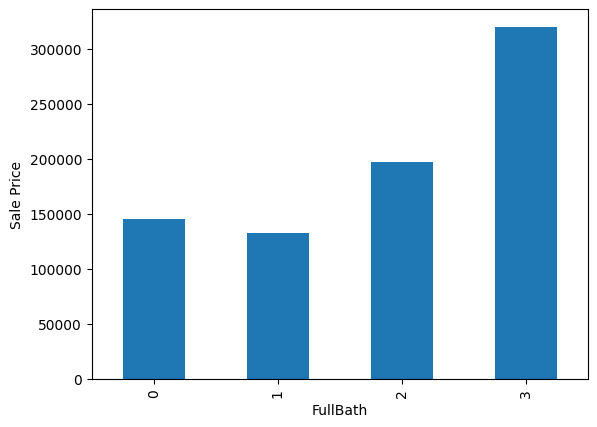

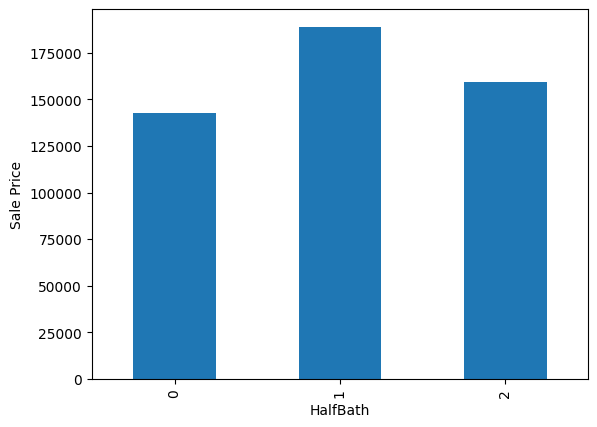

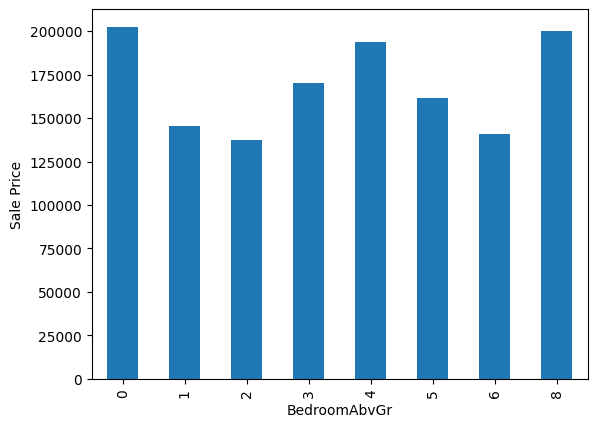

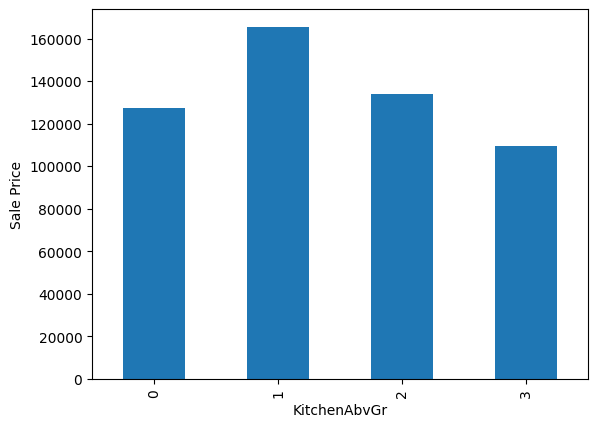

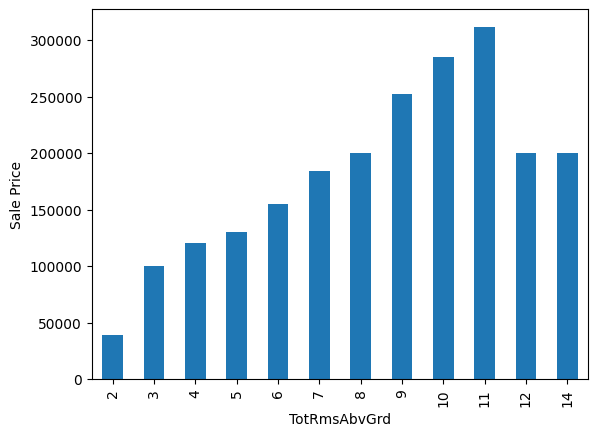

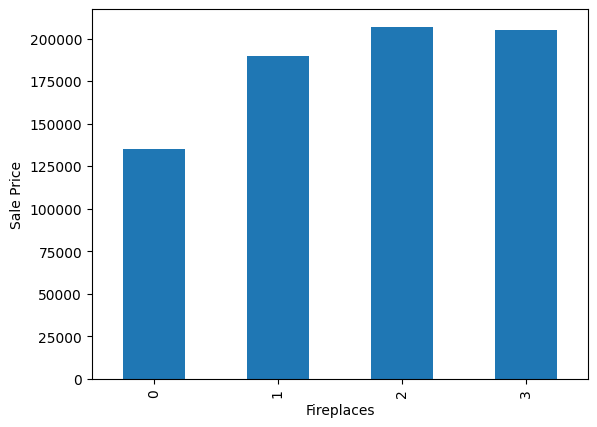

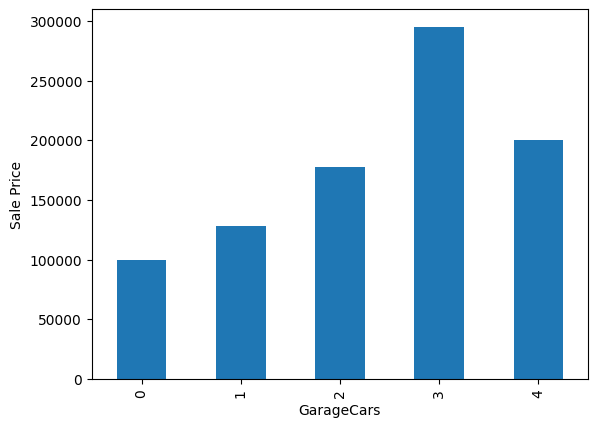

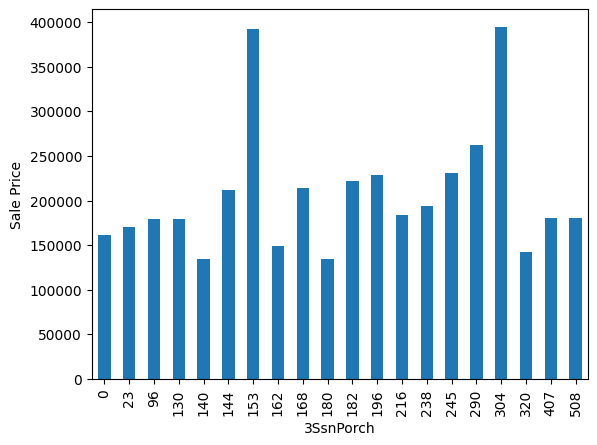

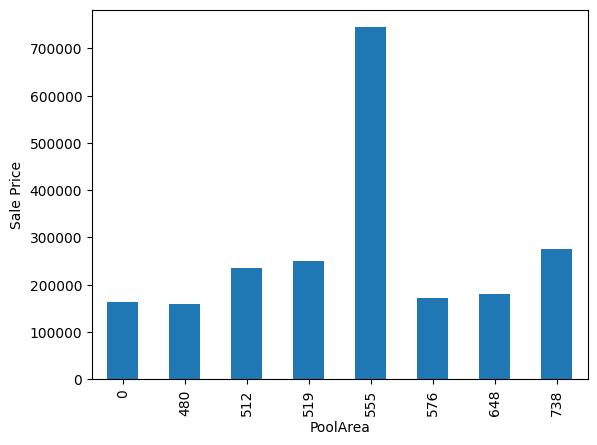

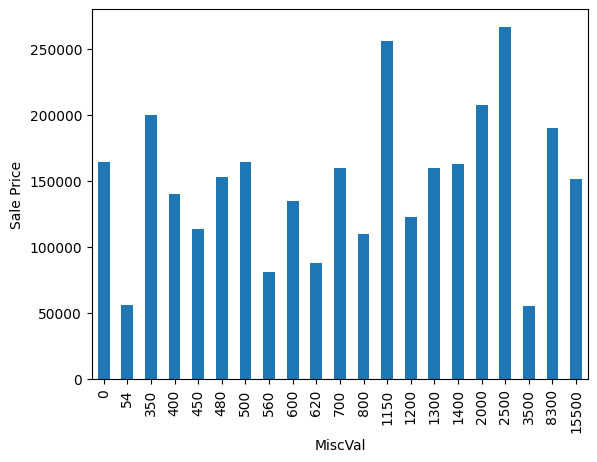

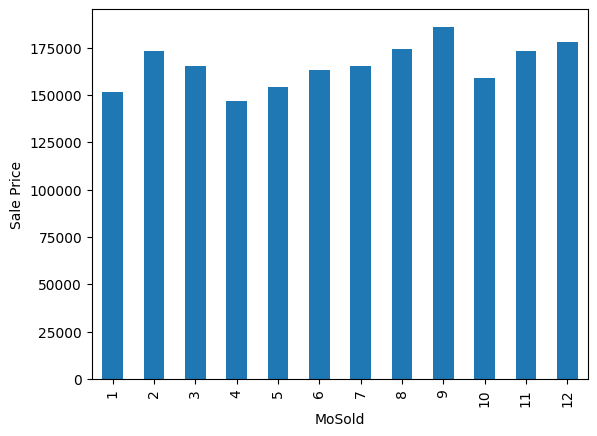

In [102]:
# We will compare the difference between all features except years and who have unique value more then 30.
data = datasetTrain.copy()
discreet_feature = [feature for feature in numerical_Feature if len(datasetTrain[feature].unique())<=30]
for feature in discreet_feature:
    if feature != 'YrSold' and feature != 'Id':
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

Numerical variables are of wo types
1. Descreet
2. Continous

In [103]:
# Get the Discreet value
datasetTrain[discreet_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


In [104]:
# Get the continous value
continous_feature = [feature for feature in numerical_Feature if feature not in discreet_feature +year_feature +['Id']]
datasetTrain[continous_feature].head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


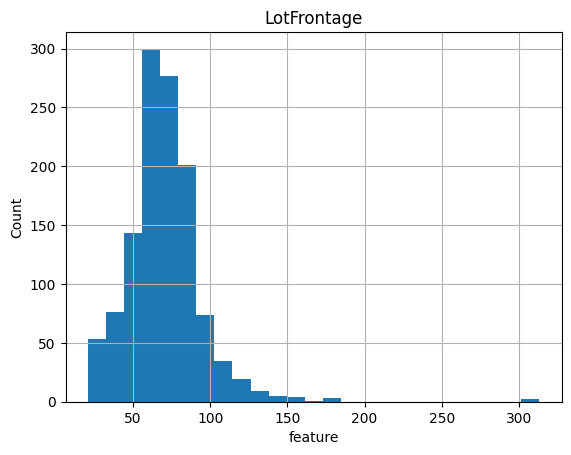

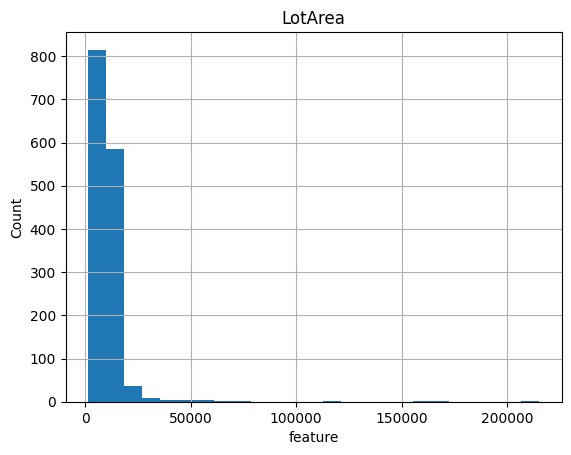

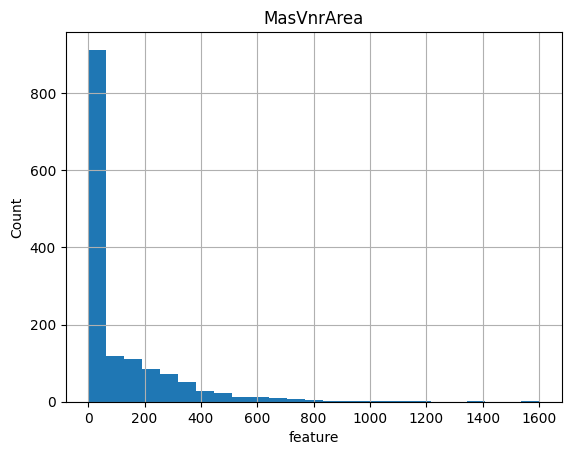

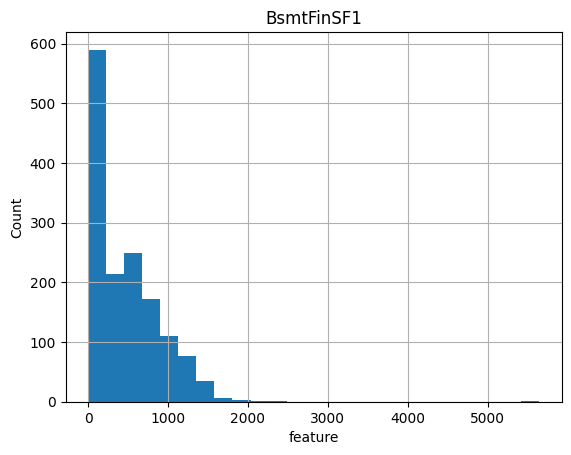

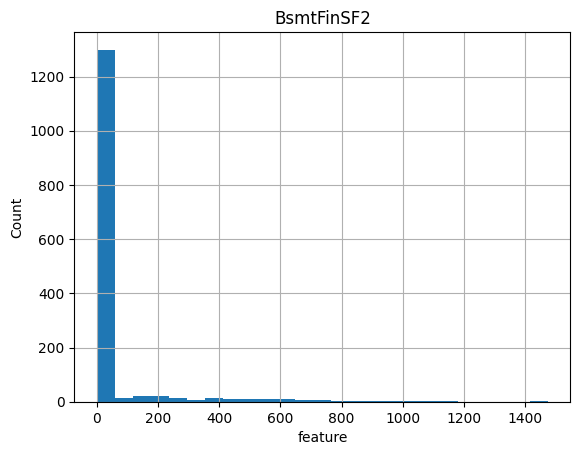

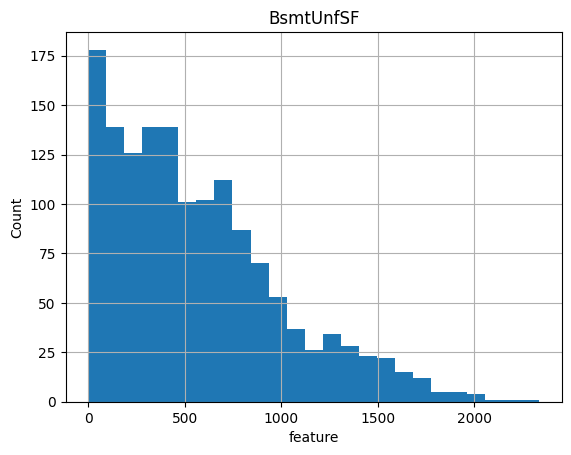

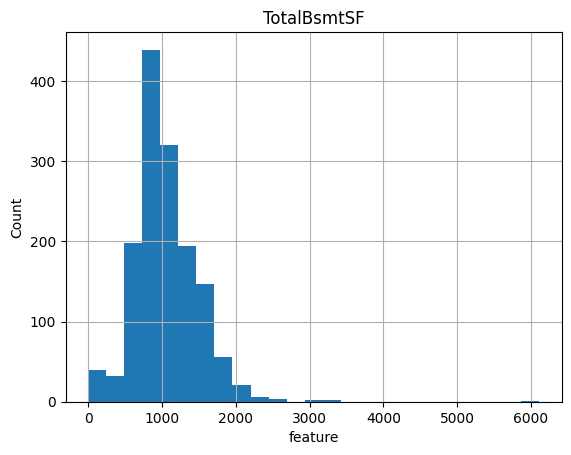

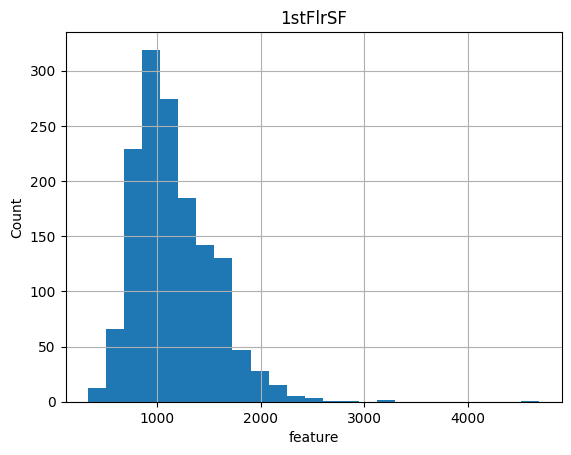

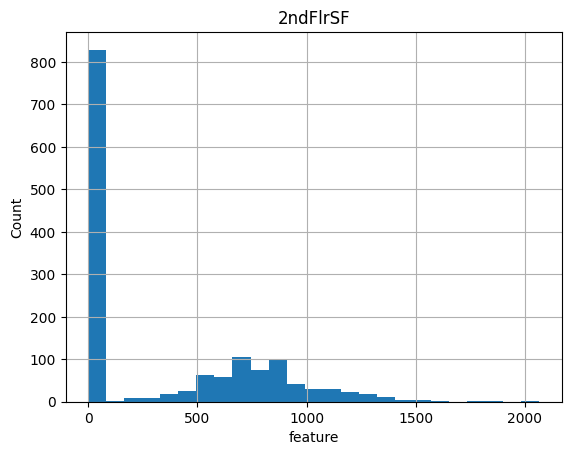

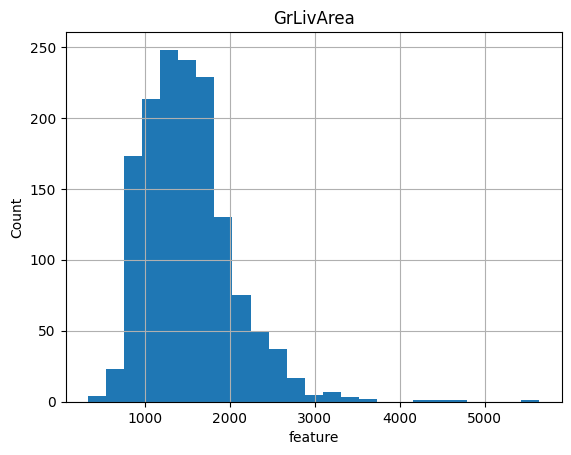

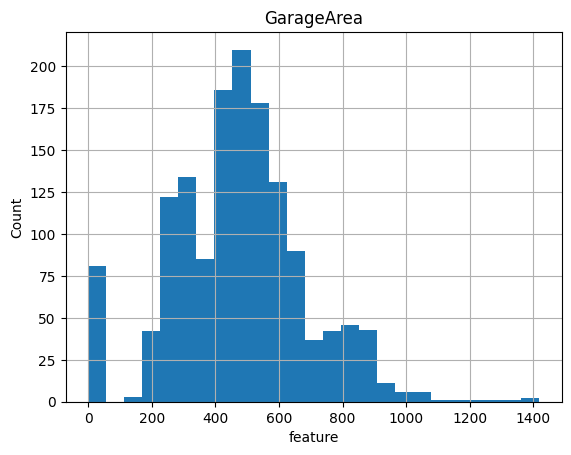

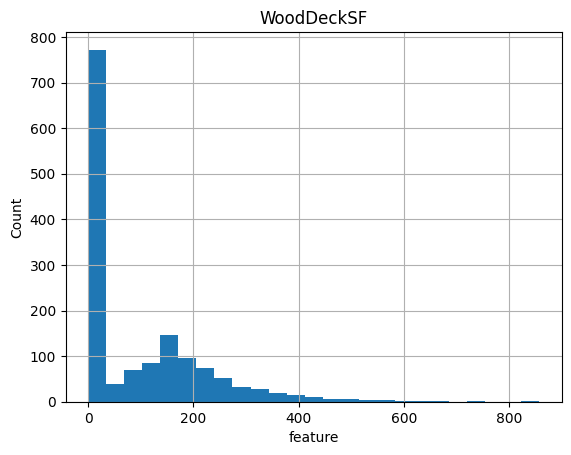

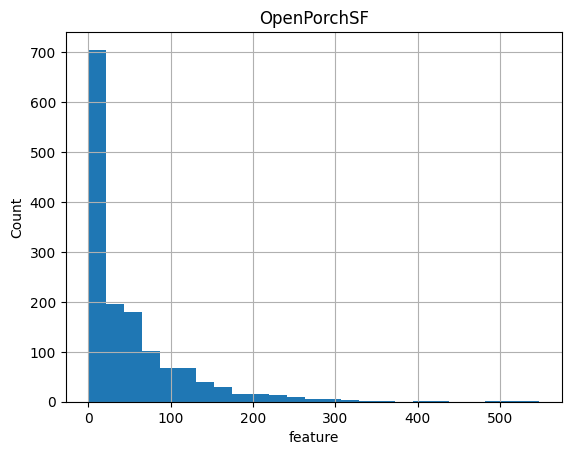

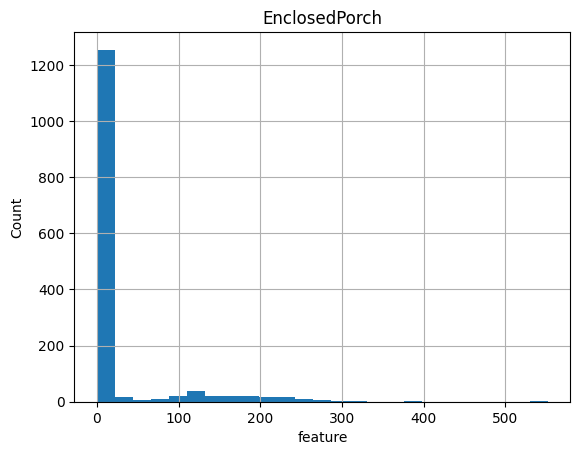

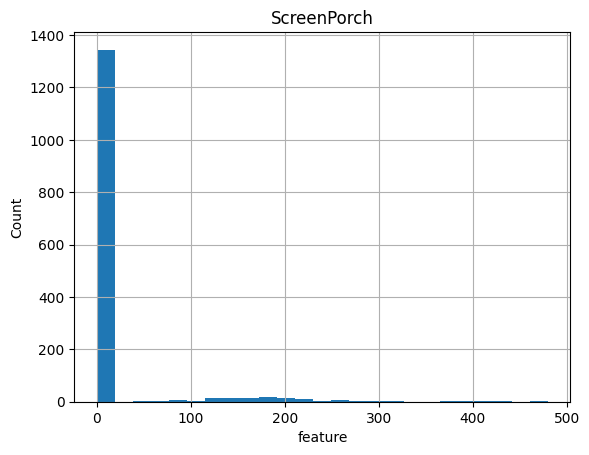

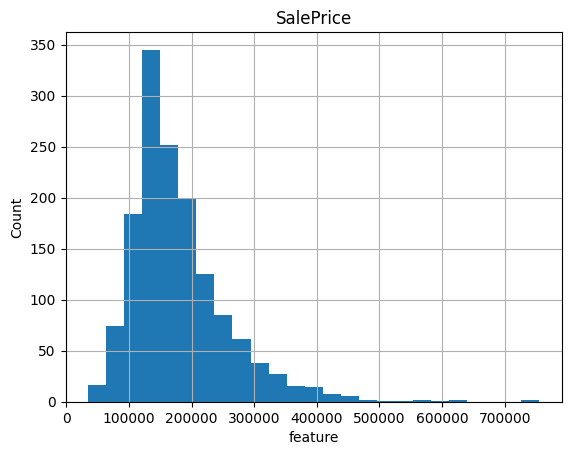

In [105]:
# Lets analyze the the relationship of continous features with histogram count
data = datasetTrain.copy()
for feature in continous_feature:
    data[feature].hist(bins =25)
    plt.xlabel('feature')
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

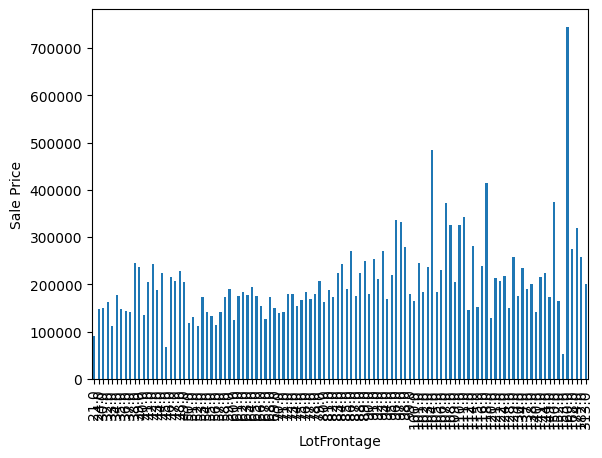

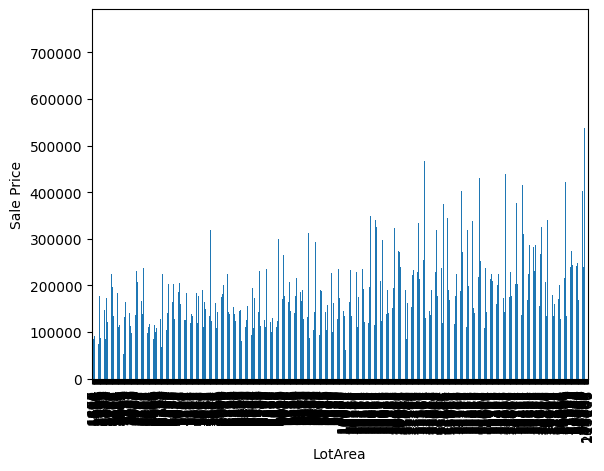

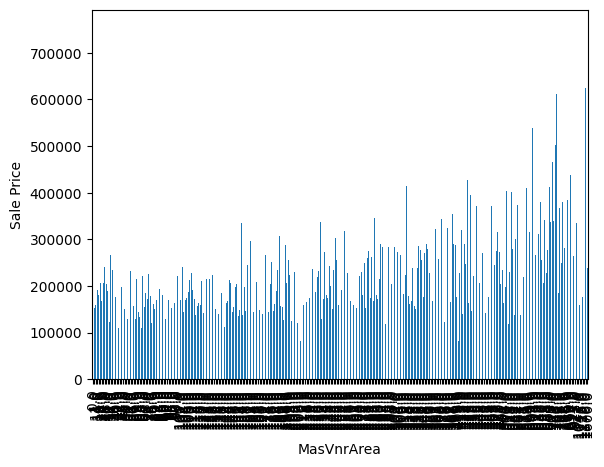

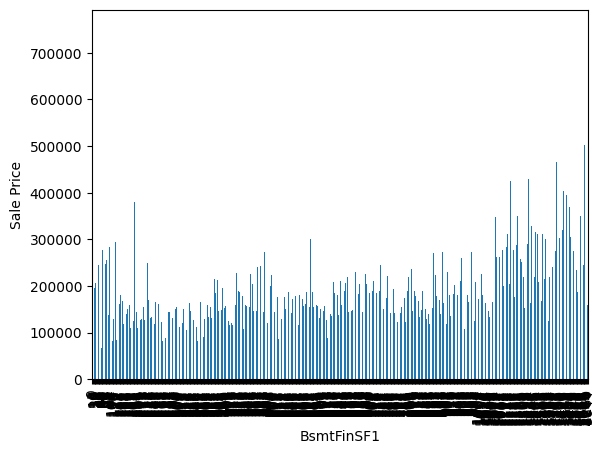

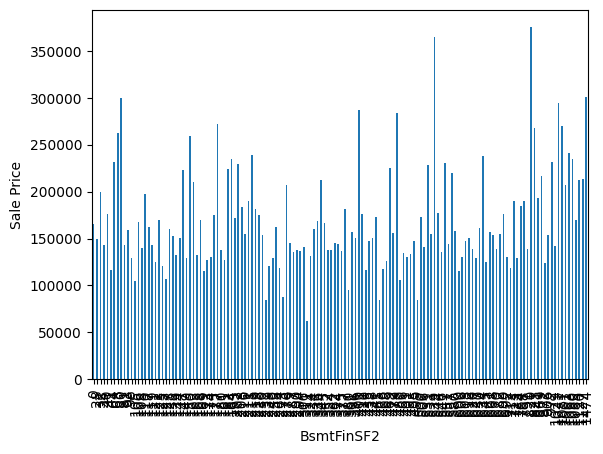

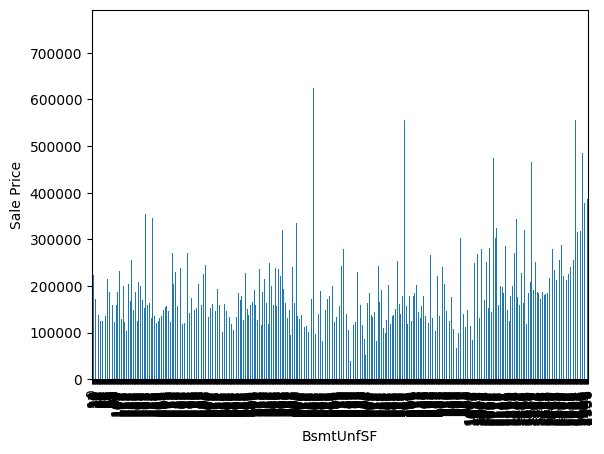

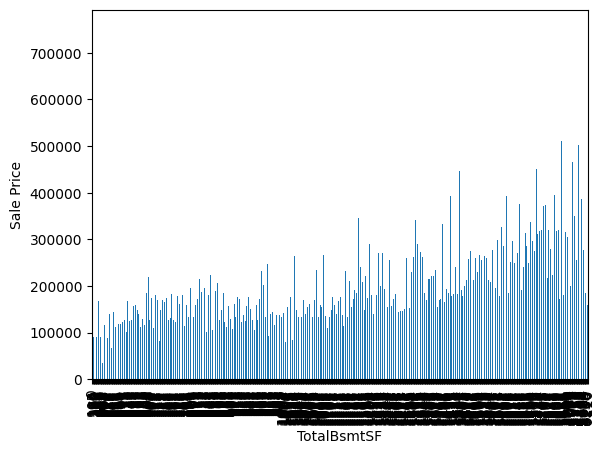

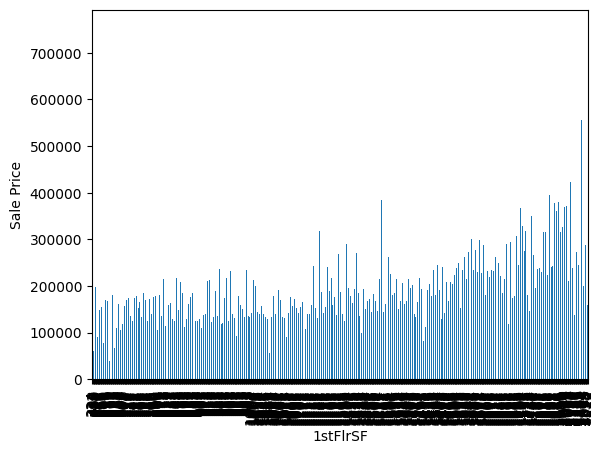

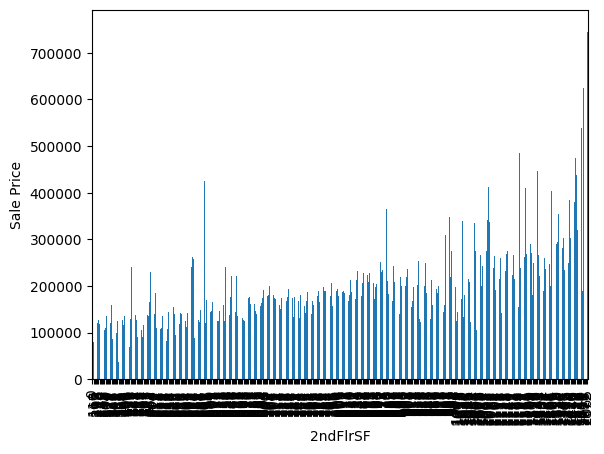

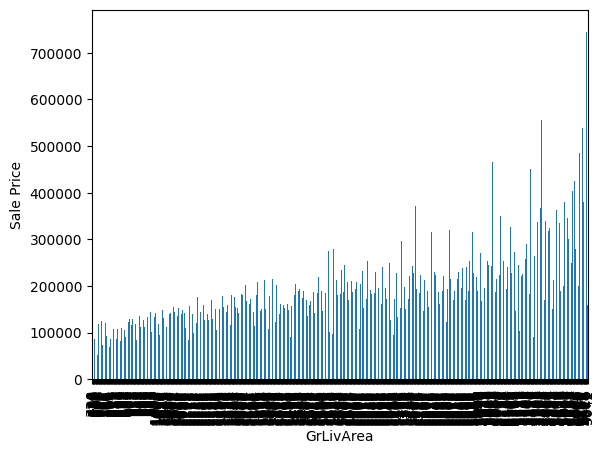

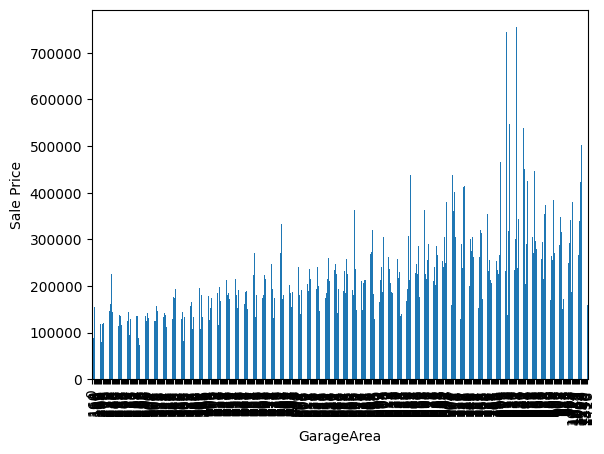

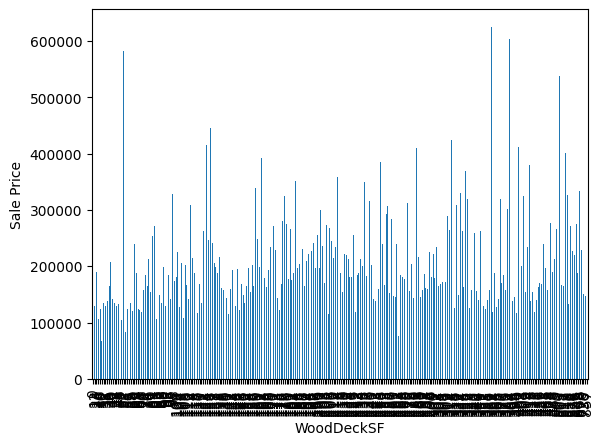

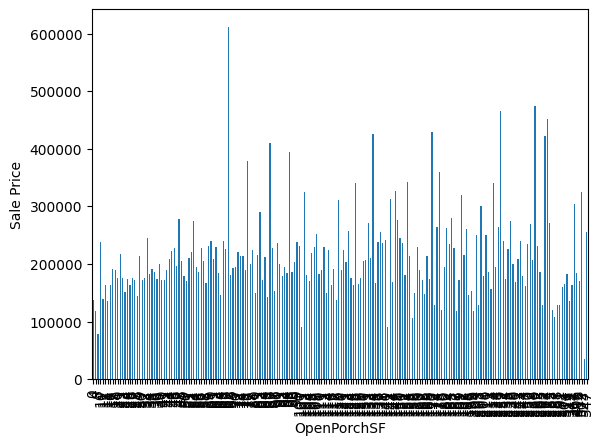

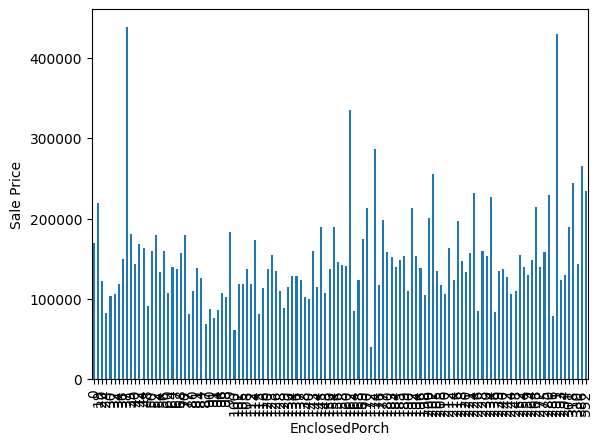

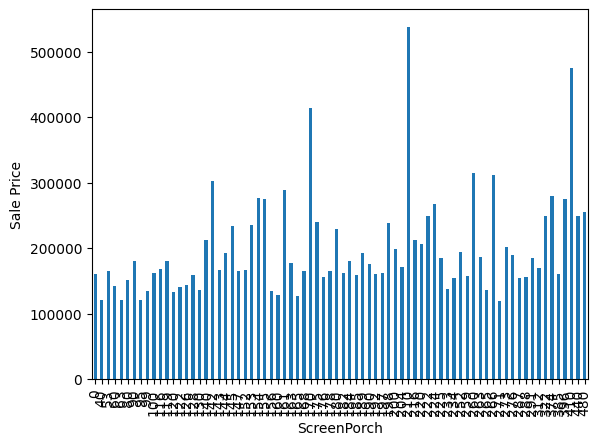

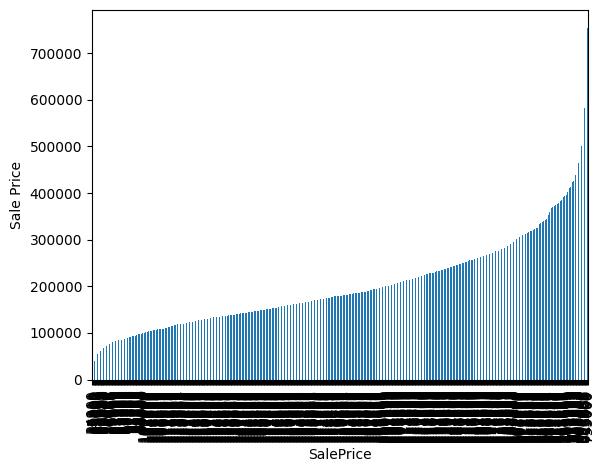

In [106]:

for feature in continous_feature:
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

In [107]:
# Categorical Feature
categoricalFeature =[feature for feature in datasetTrain.columns if datasetTrain[feature].dtype =='O']
datasetTrain[categoricalFeature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [108]:
categoricalFeatureNan = [feature for feature in datasetTrain[categoricalFeature] if datasetTrain[feature].isnull().sum() >=1]
categoricalFeatureNan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [109]:
for feature in categoricalFeatureNan:
    print(' the feature in {} missing value are {} with percentage {} % missing value'.format(feature, 
    datasetTrain[feature].isnull().sum(),
    np.round(datasetTrain[feature].isnull().mean()*100,2)
     ))

 the feature in Alley missing value are 1369 with percentage 93.77 % missing value
 the feature in MasVnrType missing value are 872 with percentage 59.73 % missing value
 the feature in BsmtQual missing value are 37 with percentage 2.53 % missing value
 the feature in BsmtCond missing value are 37 with percentage 2.53 % missing value
 the feature in BsmtExposure missing value are 38 with percentage 2.6 % missing value
 the feature in BsmtFinType1 missing value are 37 with percentage 2.53 % missing value
 the feature in BsmtFinType2 missing value are 38 with percentage 2.6 % missing value
 the feature in Electrical missing value are 1 with percentage 0.07 % missing value
 the feature in FireplaceQu missing value are 690 with percentage 47.26 % missing value
 the feature in GarageType missing value are 81 with percentage 5.55 % missing value
 the feature in GarageFinish missing value are 81 with percentage 5.55 % missing value
 the feature in GarageQual missing value are 81 with percenta

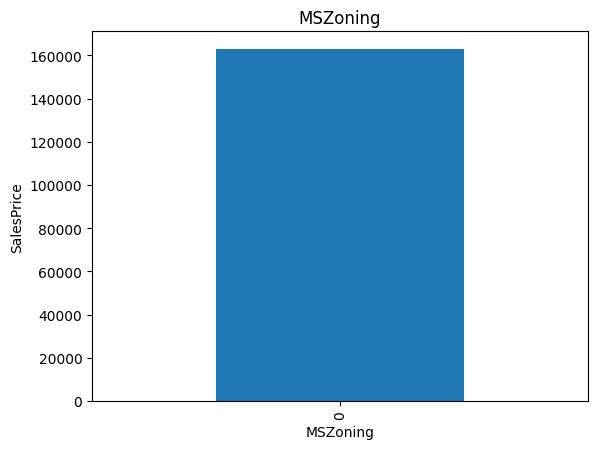

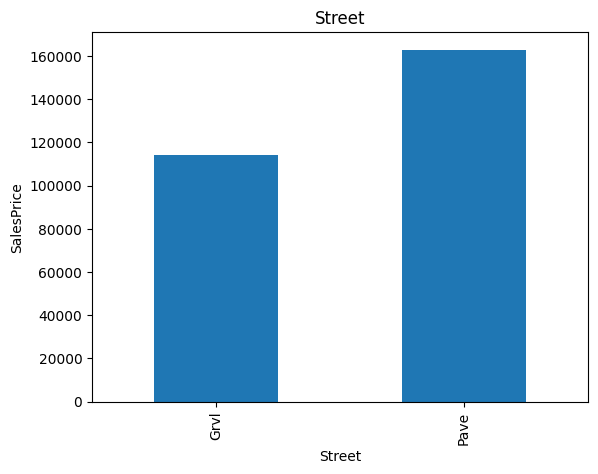

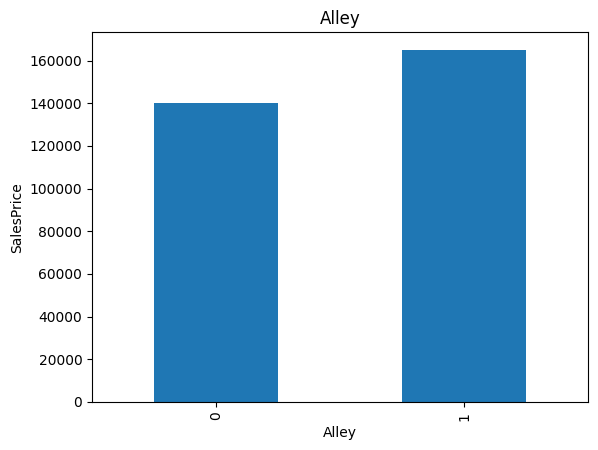

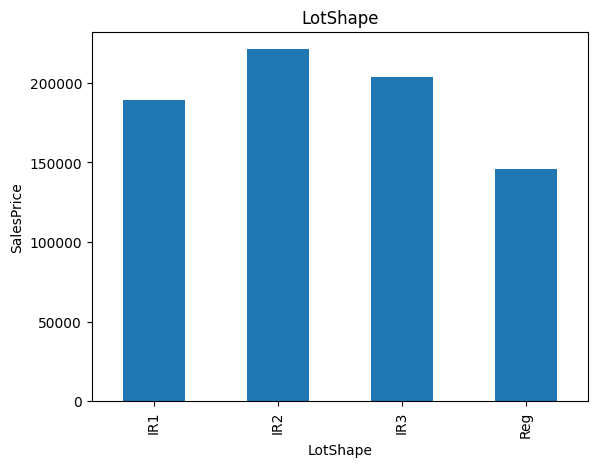

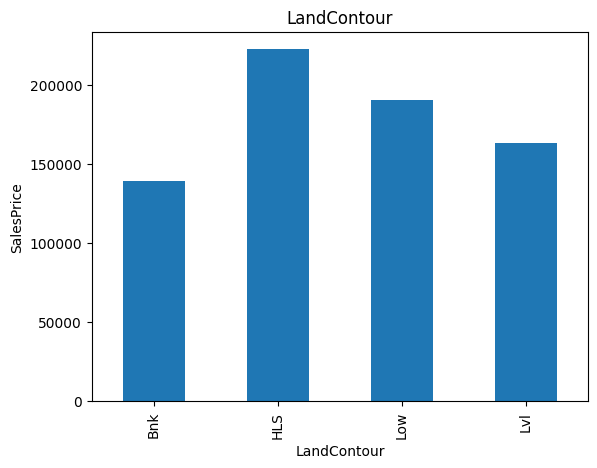

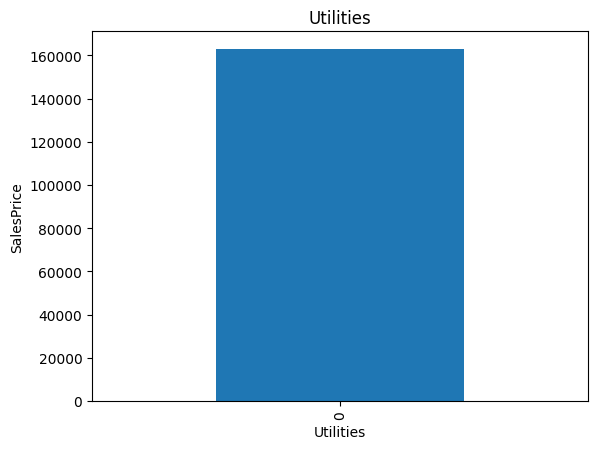

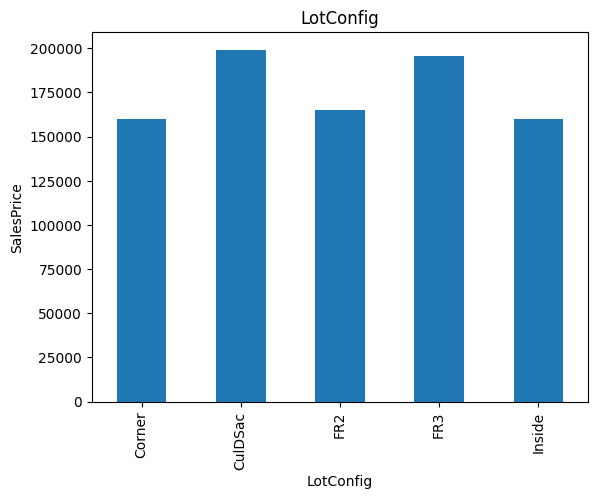

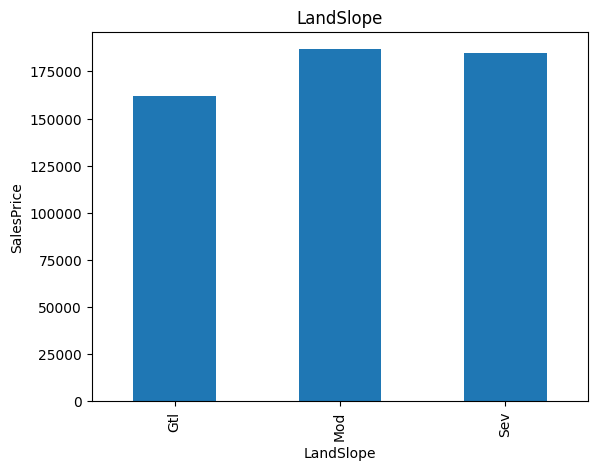

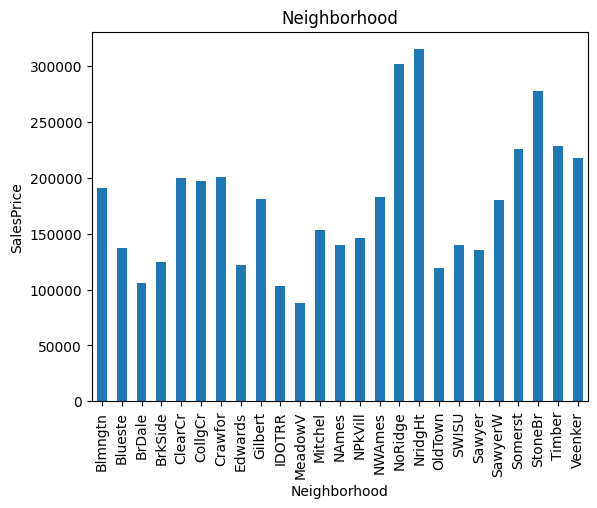

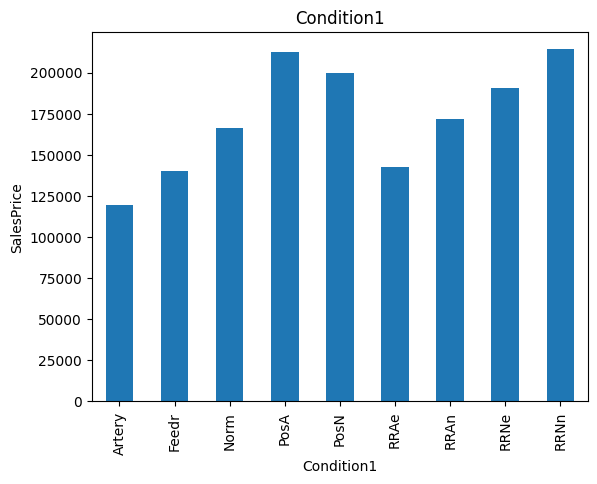

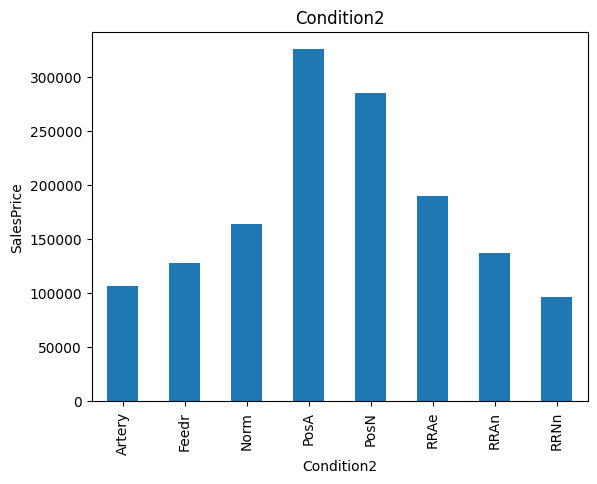

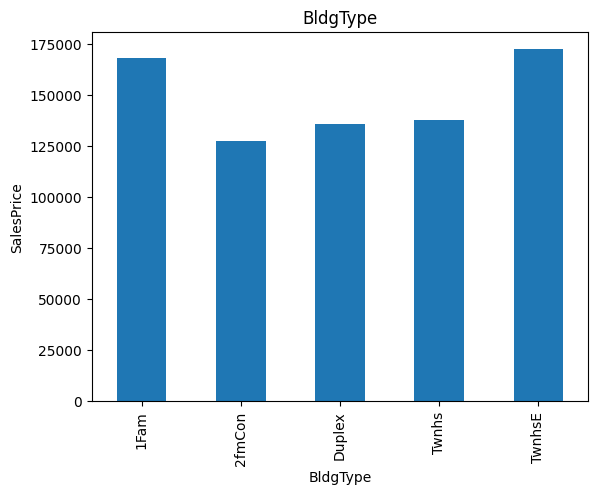

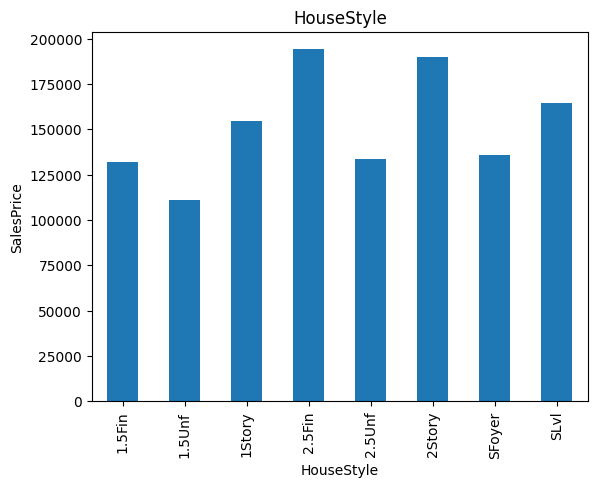

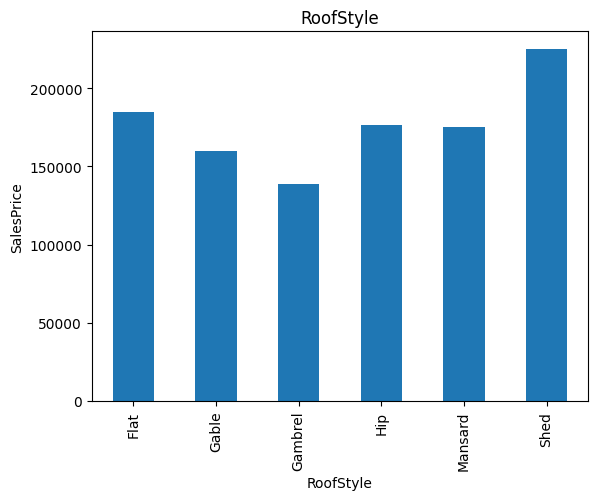

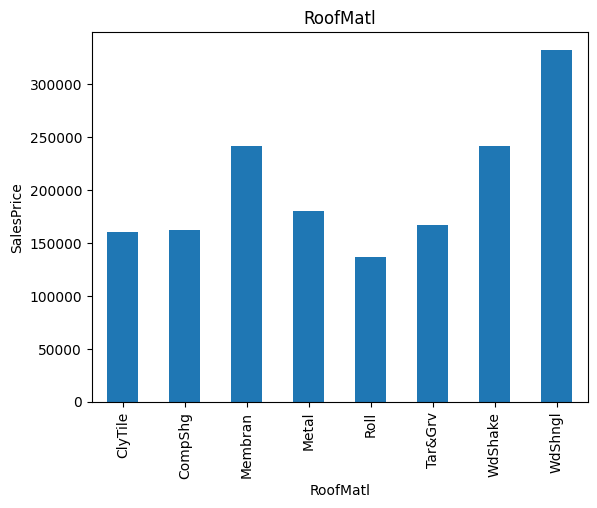

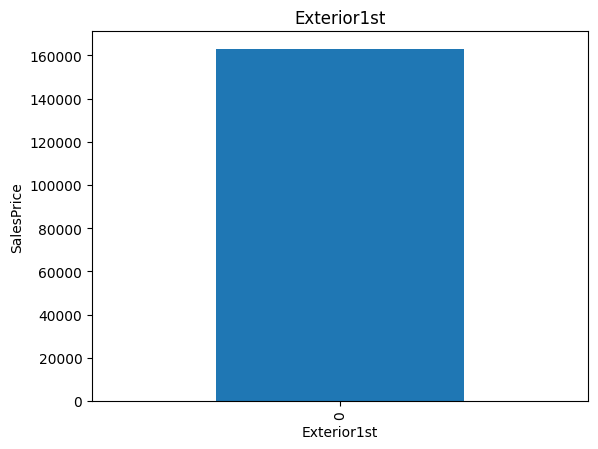

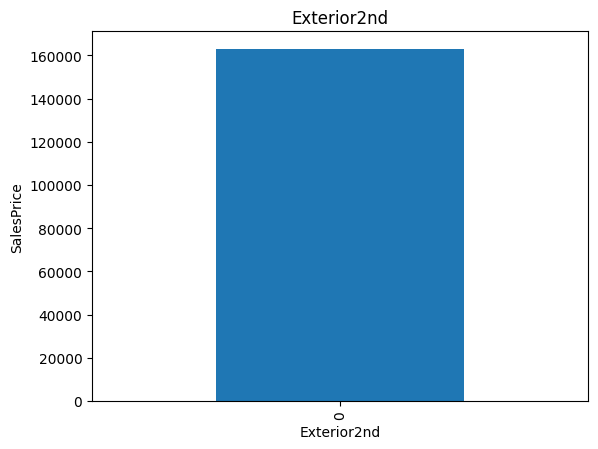

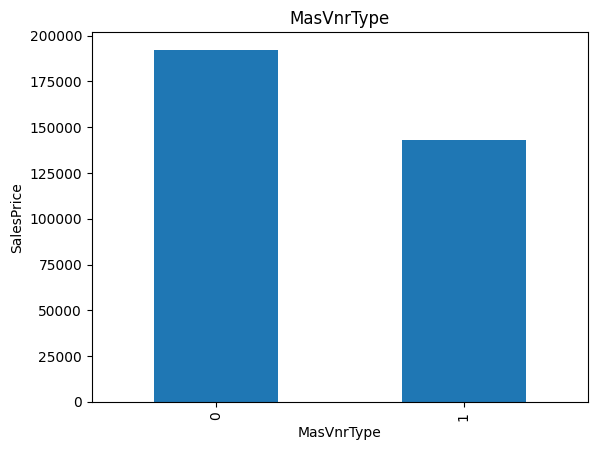

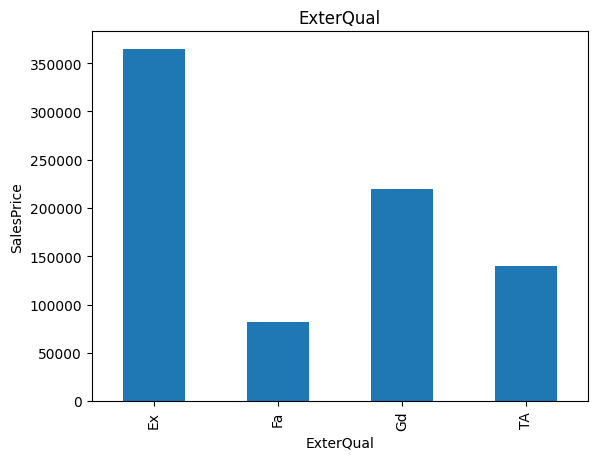

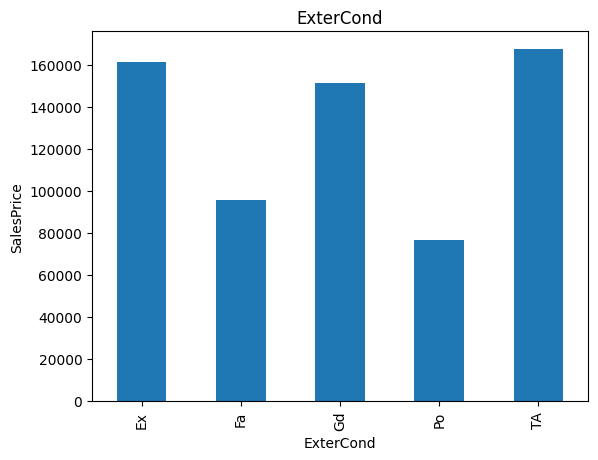

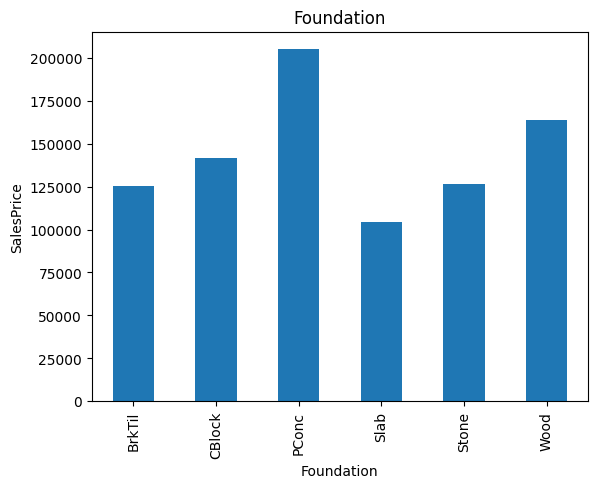

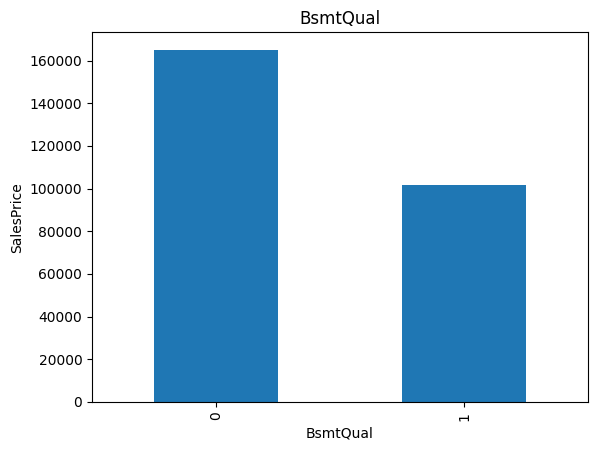

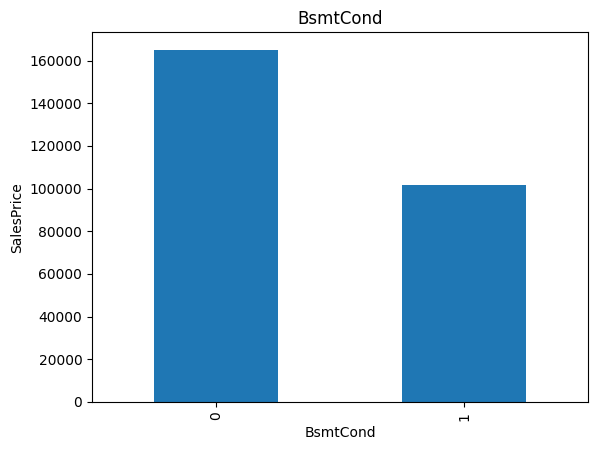

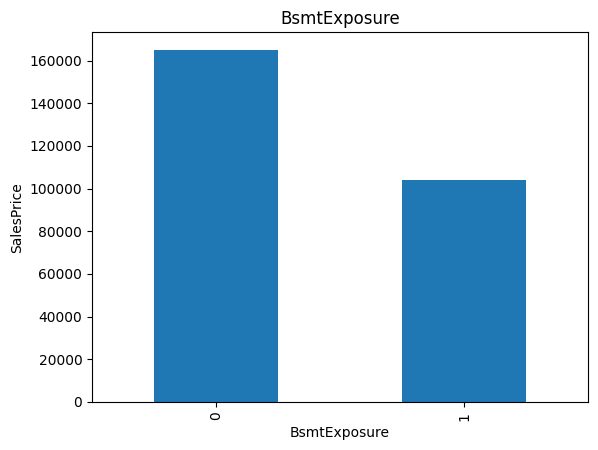

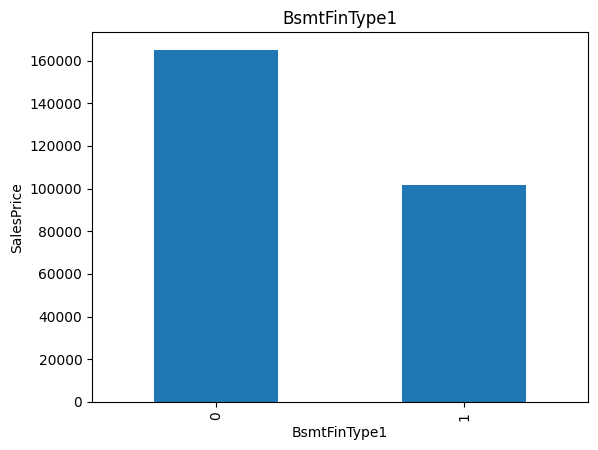

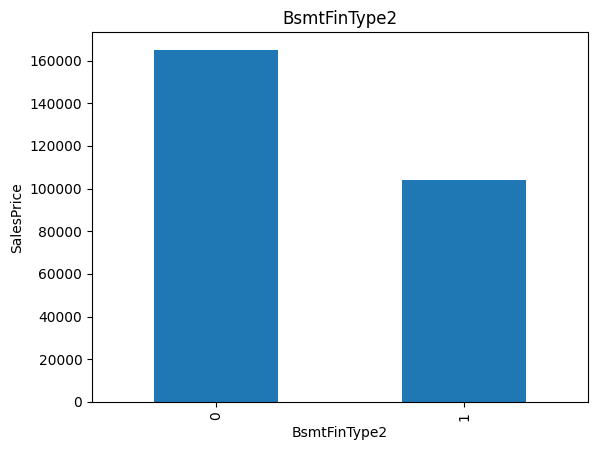

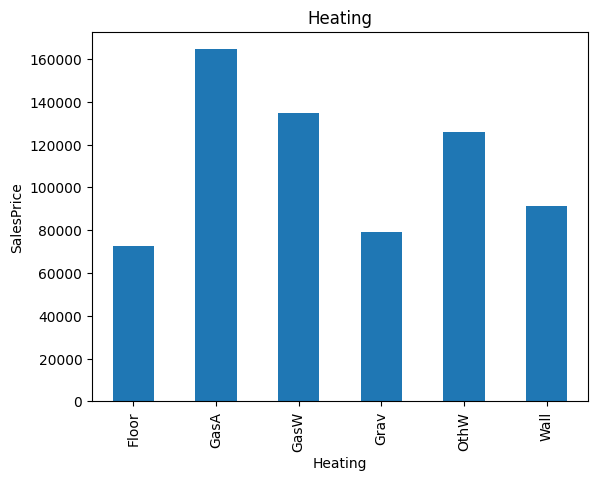

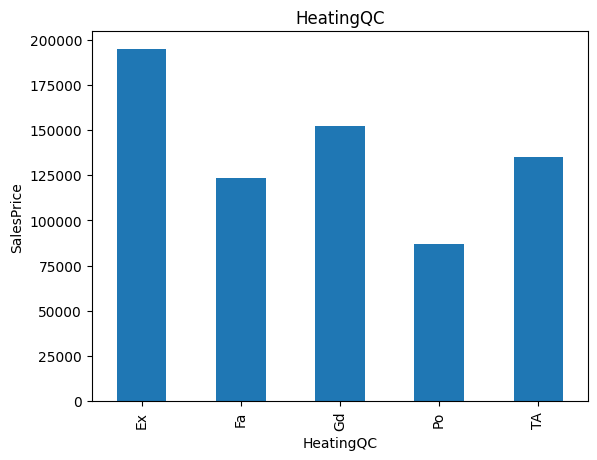

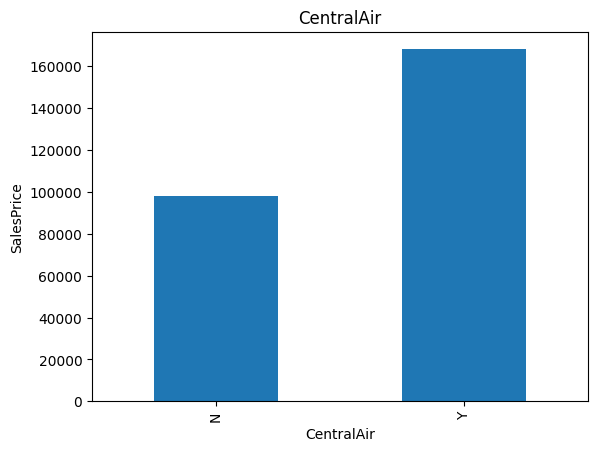

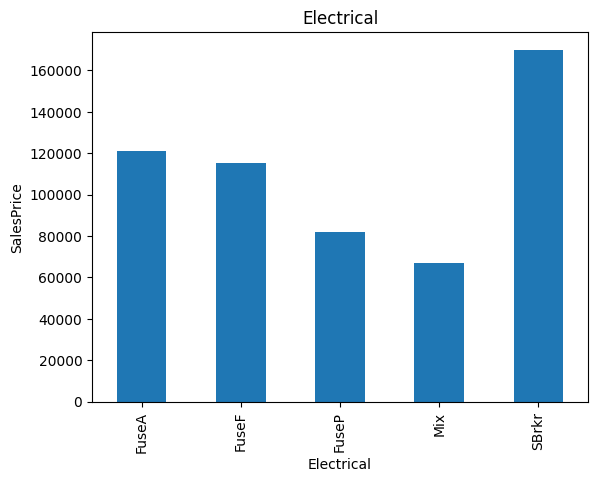

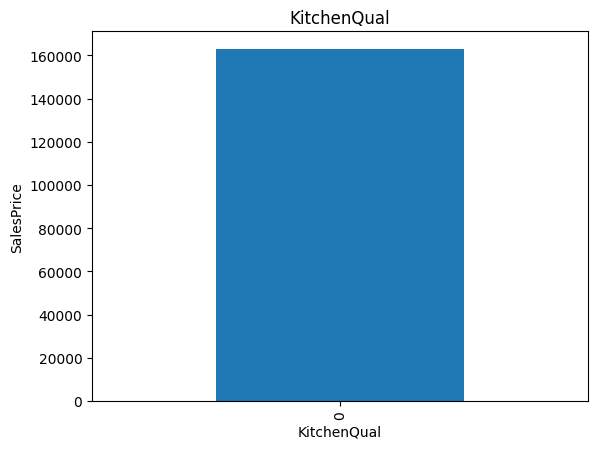

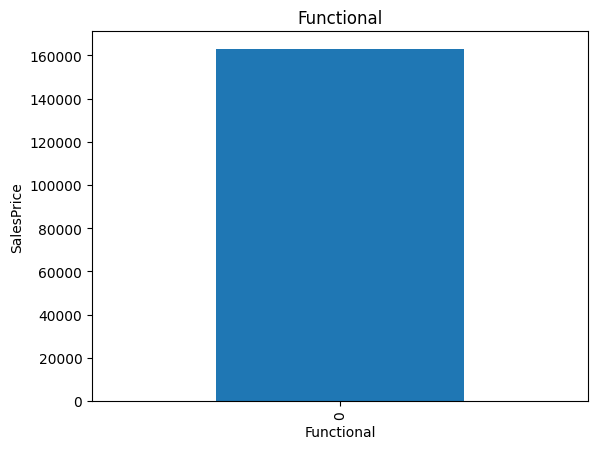

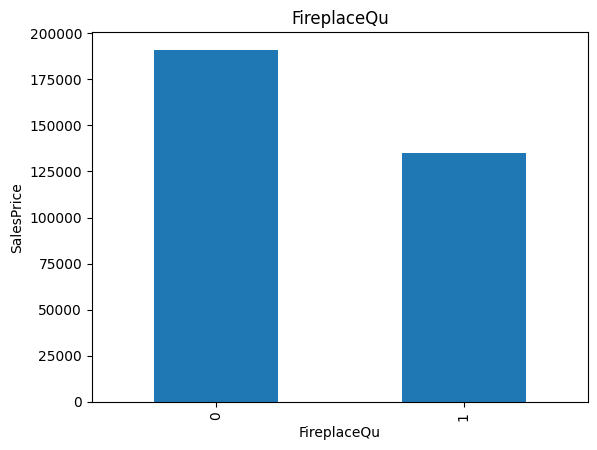

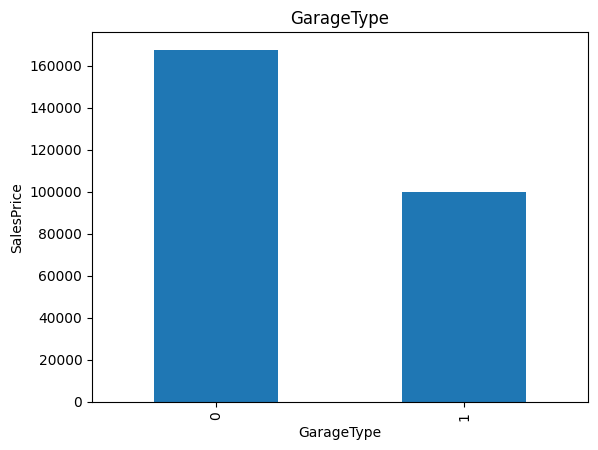

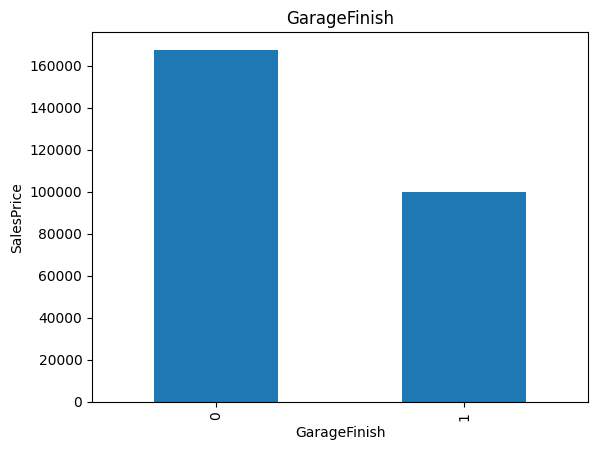

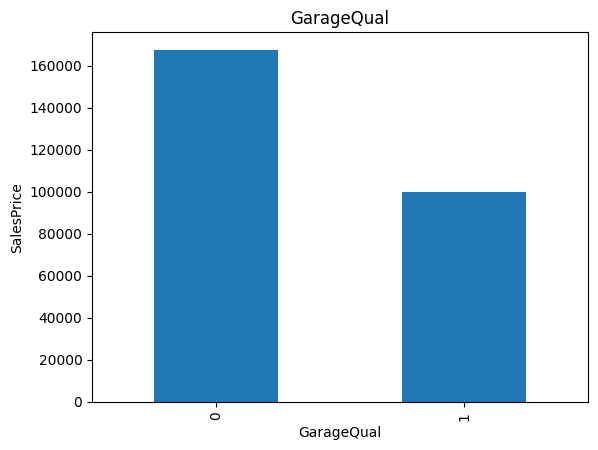

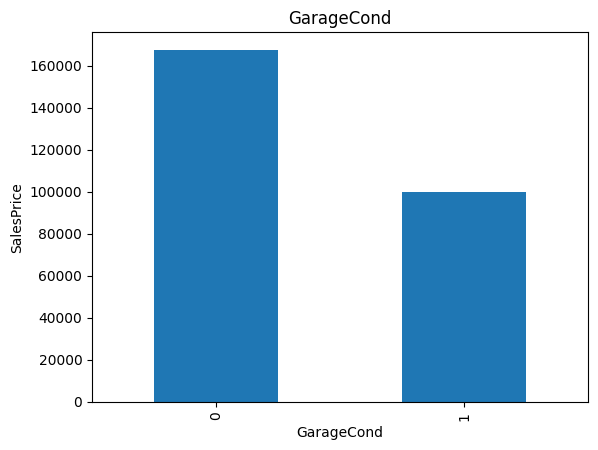

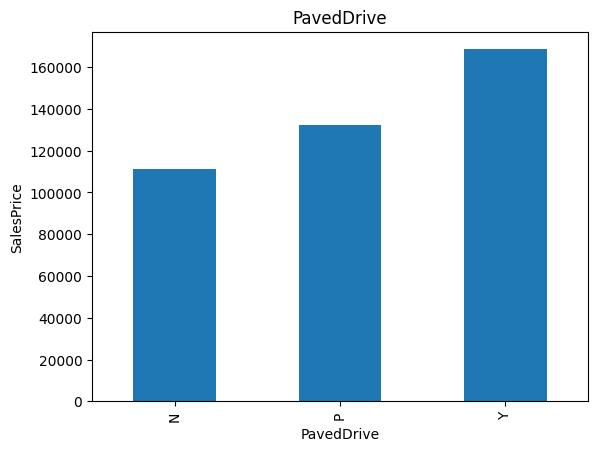

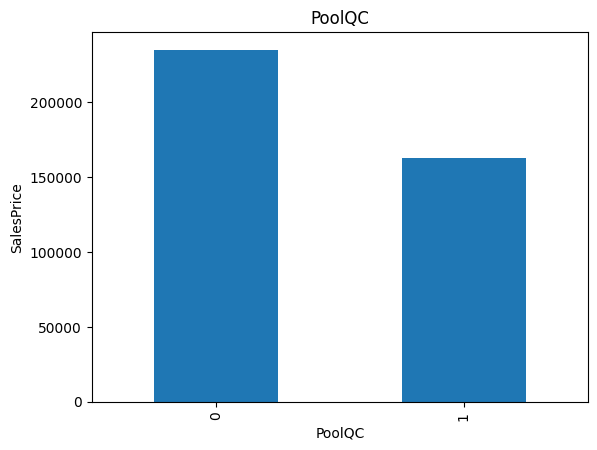

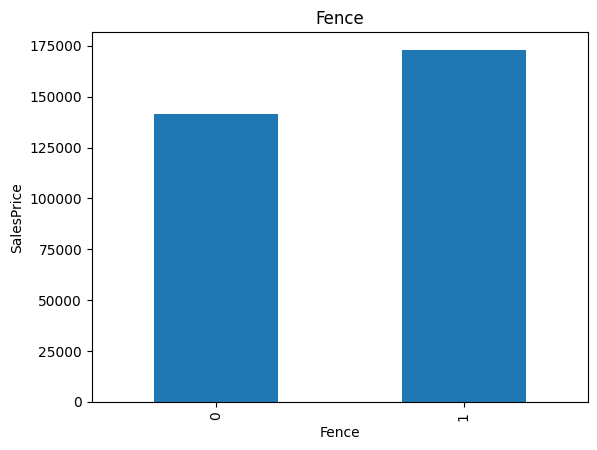

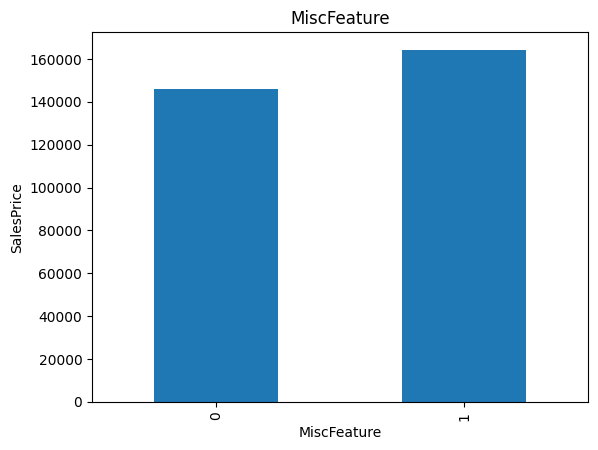

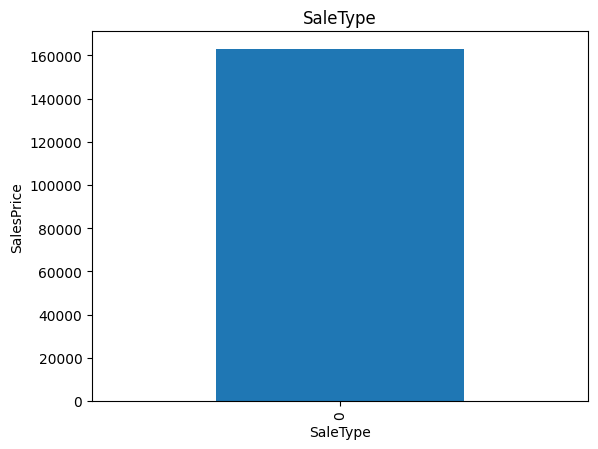

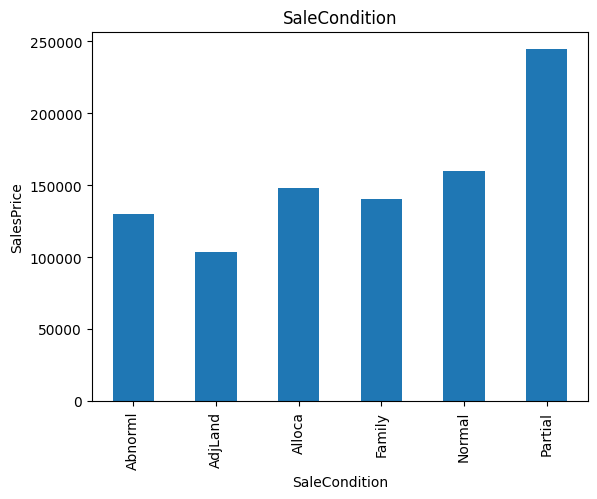

In [110]:
# Find the relationship between categorical feature on sale price
data = datasetCopy.copy()
for feature in categoricalFeature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

#Featur Engineering

In [111]:
datasetTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
dataset_Test = pd.read_csv('test.csv')
dataset_Test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Comapre the Test and Train data set

<Axes: >

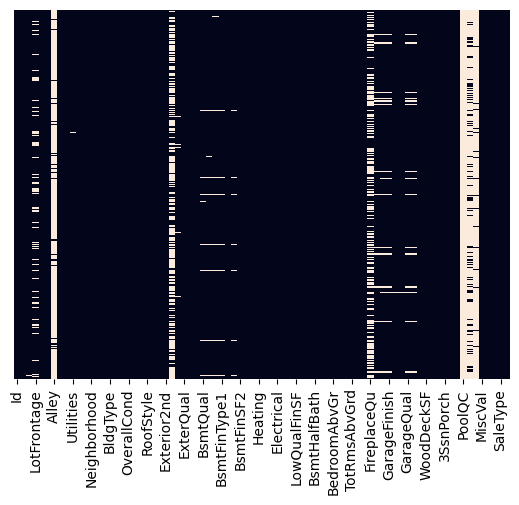

In [113]:
## To get the null values in the data. White color show the null values
sns.heatmap(dataset_Test.isnull(),yticklabels=False,cbar=False)

<Axes: >

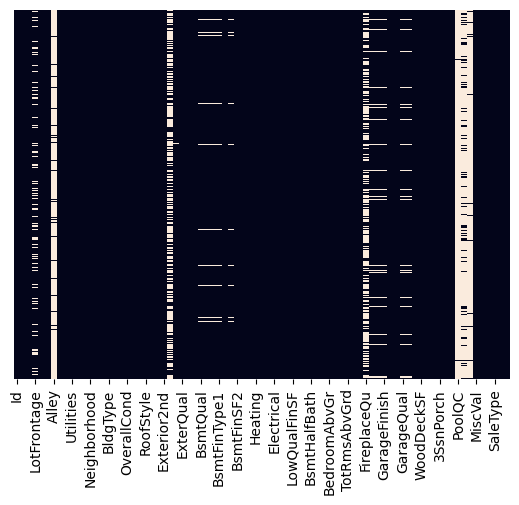

In [114]:
# Heat map for Train dataSet
sns.heatmap(datasetTrain.isnull(),yticklabels=False,cbar=False)

In [115]:
## Get the information about Test dataSet
dataset_Test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [116]:
print(dataset_Test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [117]:
## Get the information about Train dataSet
dataset_Test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [118]:
print(dataset_Test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [119]:
## Lot Frange is column which have null values and categorical object
dataset_Test['LotFrontage'].unique()

array([ 80.,  81.,  74.,  78.,  43.,  75.,  nan,  63.,  85.,  70.,  26.,
        21.,  24., 102.,  94.,  90.,  79., 110., 105.,  41., 100.,  67.,
        60.,  73.,  92.,  84.,  39.,  88.,  25.,  30.,  57.,  68.,  98.,
       120.,  87., 119.,  65.,  56.,  69.,  50.,  53.,  52.,  51.,  72.,
        86., 124.,  44.,  83.,  64.,  82.,  38.,  89.,  35.,  58.,  66.,
        93.,  31.,  76.,  28.,  61.,  95., 129.,  59.,  77.,  96.,  47.,
        34., 117.,  48.,  62.,  42., 106., 112.,  32., 115.,  71.,  45.,
       109., 113., 125., 101., 104., 108., 130., 135.,  36.,  55., 136.,
        97.,  91.,  37.,  22., 103.,  99.,  40., 123.,  54., 107., 150.,
       160., 195., 128.,  33., 118., 134., 155., 126.,  46., 149., 200.,
       121., 131., 114.,  49., 133., 140.])

In [120]:
## Lot Frange is column which have null values and categorical object
dataset_Test['LotFrontage'].unique()

array([ 80.,  81.,  74.,  78.,  43.,  75.,  nan,  63.,  85.,  70.,  26.,
        21.,  24., 102.,  94.,  90.,  79., 110., 105.,  41., 100.,  67.,
        60.,  73.,  92.,  84.,  39.,  88.,  25.,  30.,  57.,  68.,  98.,
       120.,  87., 119.,  65.,  56.,  69.,  50.,  53.,  52.,  51.,  72.,
        86., 124.,  44.,  83.,  64.,  82.,  38.,  89.,  35.,  58.,  66.,
        93.,  31.,  76.,  28.,  61.,  95., 129.,  59.,  77.,  96.,  47.,
        34., 117.,  48.,  62.,  42., 106., 112.,  32., 115.,  71.,  45.,
       109., 113., 125., 101., 104., 108., 130., 135.,  36.,  55., 136.,
        97.,  91.,  37.,  22., 103.,  99.,  40., 123.,  54., 107., 150.,
       160., 195., 128.,  33., 118., 134., 155., 126.,  46., 149., 200.,
       121., 131., 114.,  49., 133., 140.])

<Axes: ylabel='LotFrontage'>

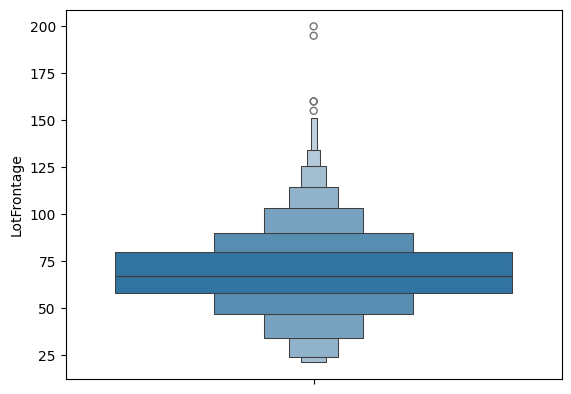

In [121]:
## To check the outlier value
sns.boxenplot(dataset_Test['LotFrontage'])

<Axes: ylabel='LotFrontage'>

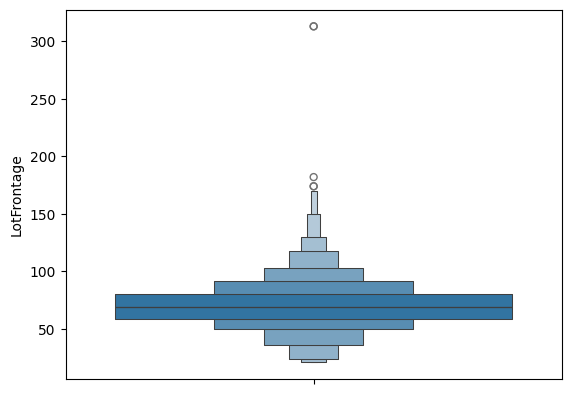

In [122]:
## To check the outlier value
sns.boxenplot(datasetTrain['LotFrontage'])

In [123]:
## Median will calulate for outlier value and fill it in place of null value
datasetTrain['LotFrontage'] = datasetTrain['LotFrontage'].fillna(datasetTrain['LotFrontage'].median())
dataset_Test['LotFrontage'] = dataset_Test['LotFrontage'].fillna(dataset_Test['LotFrontage'].median())

In [124]:
dataset_Test['LotFrontage'].isnull().sum()

0

In [125]:
datasetTrain['LotFrontage'].isnull().sum()

0

In [126]:
# To check the non object type with null values
[feature for feature in datasetTrain.columns if datasetTrain[feature].dtype != 'object' and datasetTrain[feature].isnull().sum()>=1]


['MasVnrArea', 'GarageYrBlt']

<Axes: ylabel='MasVnrArea'>

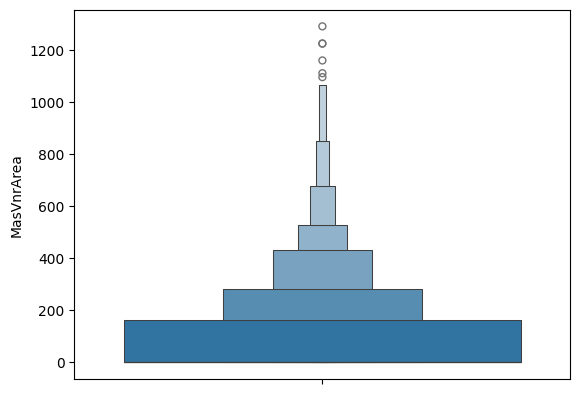

In [127]:
## To check the outlier value
sns.boxenplot(dataset_Test['MasVnrArea'])

In [128]:
## Median will calulate for outlier value and fill it in place of null value
datasetTrain['MasVnrArea'] = dataset_Test['MasVnrArea'].fillna(datasetTrain['MasVnrArea'].median())
dataset_Test['MasVnrArea'] = dataset_Test['MasVnrArea'].fillna(dataset_Test['MasVnrArea'].median())

In [129]:
dataset_Test['MasVnrArea'].isnull().sum()

0

In [130]:
datasetTrain['MasVnrArea'].isnull().sum()

1

<Axes: ylabel='GarageYrBlt'>

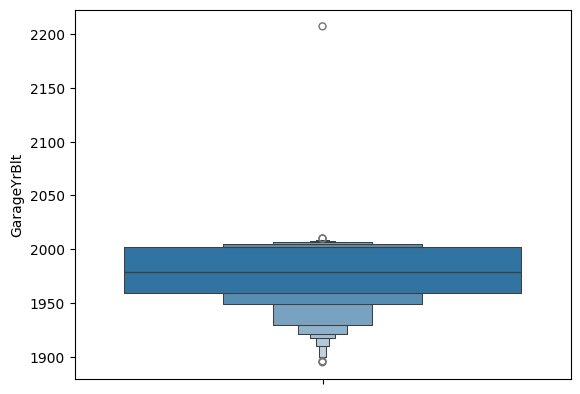

In [131]:
## To check the outlier value
sns.boxenplot(dataset_Test['GarageYrBlt'])

<Axes: ylabel='GarageYrBlt'>

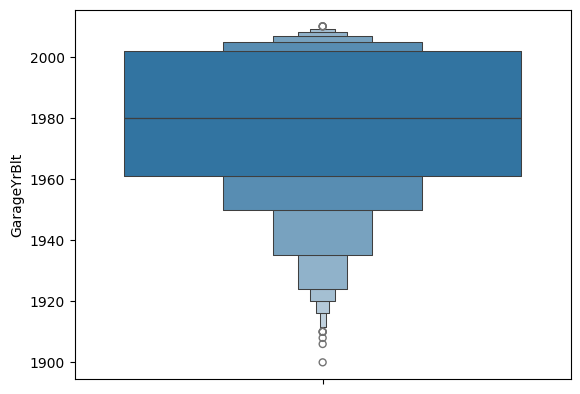

In [132]:
sns.boxenplot(datasetTrain['GarageYrBlt'])

In [133]:
## Median will calulate for outlier value and fill it in place of null value
datasetTrain['GarageYrBlt'] = datasetTrain['GarageYrBlt'].fillna(datasetTrain['GarageYrBlt'].median())
dataset_Test['GarageYrBlt'] = dataset_Test['GarageYrBlt'].fillna(dataset_Test['GarageYrBlt'].median())

In [134]:
dataset_Test['GarageYrBlt'].isnull().sum()

0

In [135]:
datasetTrain['GarageYrBlt'].isnull().sum()

0

<Axes: >

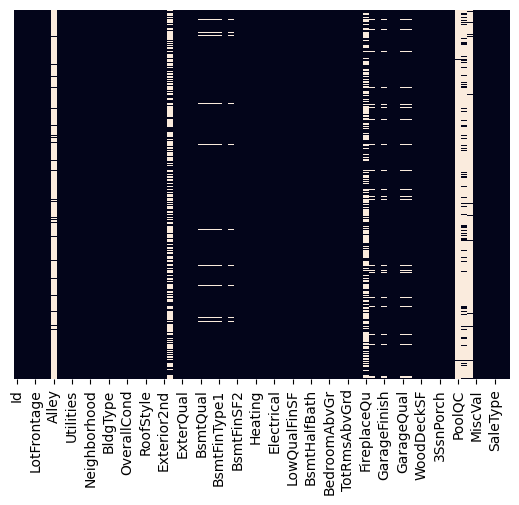

In [136]:
# Heat map for Train dataSet
sns.heatmap(datasetTrain.isnull(),yticklabels=False,cbar=False)

<Axes: >

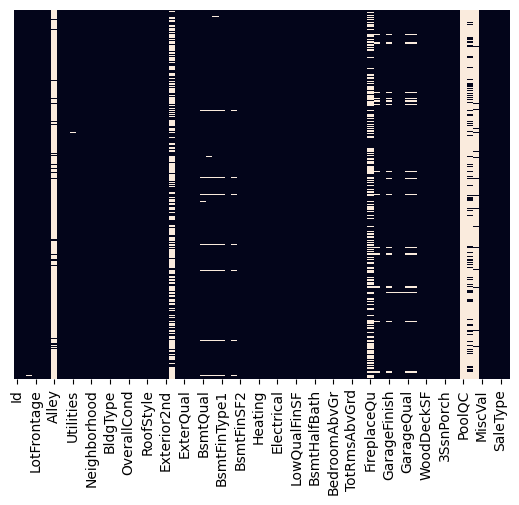

In [137]:
# Heat map for Test dataSet
sns.heatmap(dataset_Test.isnull(),yticklabels=False,cbar=False)

In [138]:
## Feature Engineering on Categorical DataSet
# To check the non object type with null values
[feature for feature in datasetTrain.columns if datasetTrain[feature].dtype == 'object' and datasetTrain[feature].isnull().sum()>=1]


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [139]:
datasetTrain['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [140]:
## In Categorical Feature we find the columns which have null values > = 50 and remove those from analysis
datasetTrain.drop(['Alley','MasVnrType','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)


In [141]:
## In Categorical Feature we find the columns which have null values > = 50 and remove those from analysis
dataset_Test.drop(['Alley','MasVnrType','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)


In [142]:
## Convert the nan values of remaining columns with mode values
datasetTrain['BsmtQual'] = datasetTrain['BsmtQual'].fillna(datasetTrain['BsmtQual'].mode()[0])
datasetTrain['BsmtCond'] = datasetTrain['BsmtCond'].fillna(datasetTrain['BsmtCond'].mode()[0])
datasetTrain['BsmtExposure'] = datasetTrain['BsmtExposure'].fillna(datasetTrain['BsmtExposure'].mode()[0])
datasetTrain['BsmtFinType1'] = datasetTrain['BsmtFinType1'].fillna(datasetTrain['BsmtFinType1'].mode()[0])
datasetTrain['BsmtFinType2'] = datasetTrain['BsmtFinType2'].fillna(datasetTrain['BsmtFinType2'].mode()[0])
datasetTrain['Electrical'] = datasetTrain['Electrical'].fillna(datasetTrain['Electrical'].mode()[0])
datasetTrain['FireplaceQu'] = datasetTrain['FireplaceQu'].fillna(datasetTrain['FireplaceQu'].mode()[0])
datasetTrain['GarageType'] = datasetTrain['GarageType'].fillna(datasetTrain['GarageType'].mode()[0])
datasetTrain['GarageFinish'] = datasetTrain['GarageFinish'].fillna(datasetTrain['GarageFinish'].mode()[0])
datasetTrain['GarageCond'] = datasetTrain['GarageCond'].fillna(datasetTrain['GarageCond'].mode()[0])
datasetTrain['GarageQual'] = datasetTrain['GarageQual'].fillna(datasetTrain['GarageQual'].mode()[0])



<Axes: >

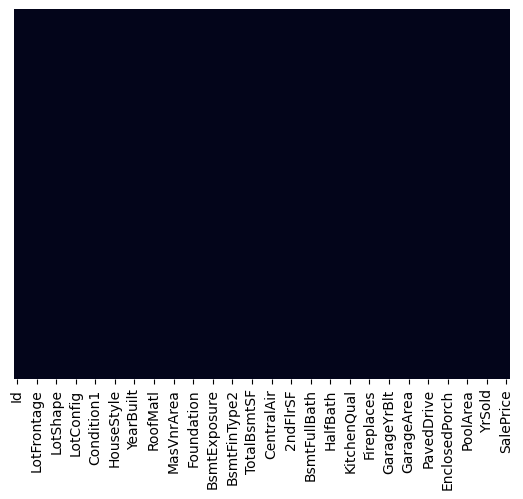

In [143]:
# Heat map for Train dataSet
sns.heatmap(datasetTrain.isnull(),yticklabels=False,cbar=False)

In [144]:
## Convert the nan values of remaining columns with mode values
dataset_Test['BsmtQual'] = dataset_Test['BsmtQual'].fillna(dataset_Test['BsmtQual'].mode()[0])
dataset_Test['BsmtCond'] = dataset_Test['BsmtCond'].fillna(dataset_Test['BsmtCond'].mode()[0])
dataset_Test['BsmtExposure'] = dataset_Test['BsmtExposure'].fillna(dataset_Test['BsmtExposure'].mode()[0])
dataset_Test['BsmtFinType1'] = dataset_Test['BsmtFinType1'].fillna(dataset_Test['BsmtFinType1'].mode()[0])
dataset_Test['BsmtFinType2'] = dataset_Test['BsmtFinType2'].fillna(dataset_Test['BsmtFinType2'].mode()[0])
dataset_Test['Electrical'] = dataset_Test['Electrical'].fillna(dataset_Test['Electrical'].mode()[0])
dataset_Test['FireplaceQu'] = dataset_Test['FireplaceQu'].fillna(dataset_Test['FireplaceQu'].mode()[0])
dataset_Test['GarageType'] = dataset_Test['GarageType'].fillna(dataset_Test['GarageType'].mode()[0])
dataset_Test['GarageFinish'] = dataset_Test['GarageFinish'].fillna(dataset_Test['GarageFinish'].mode()[0])
dataset_Test['GarageCond'] = dataset_Test['GarageCond'].fillna(dataset_Test['GarageCond'].mode()[0])
dataset_Test['GarageQual'] = dataset_Test['GarageQual'].fillna(dataset_Test['GarageQual'].mode()[0])

<Axes: >

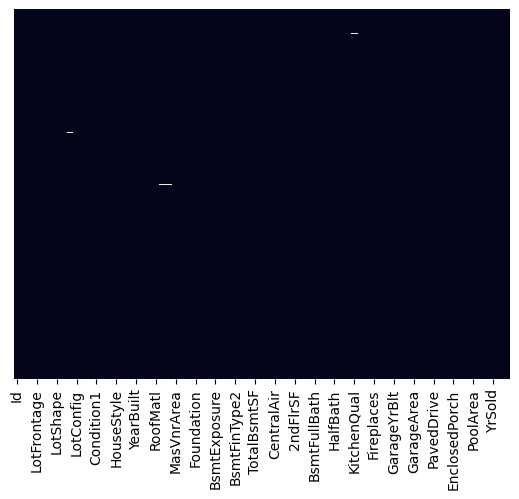

In [145]:
# Heat map for Train dataSet
sns.heatmap(dataset_Test.isnull(),yticklabels=False,cbar=False)

In [146]:
categoricalFeatureTest = [feature for feature in dataset_Test.columns if dataset_Test[feature].dtype == 'O']
categoricalFeatureTest

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [147]:
dataset_Test[categoricalFeatureTest].isnull().sum()

MSZoning         4
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      1
Functional       2
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         1
SaleCondition    0
dtype: int64

In [148]:
dataset_Test['MSZoning'] = dataset_Test['MSZoning'].fillna(dataset_Test['MSZoning'].mode()[0])
dataset_Test['SaleType'] = dataset_Test['SaleType'].fillna(dataset_Test['SaleType'].mode()[0])
dataset_Test['Exterior1st'] = dataset_Test['Exterior1st'].fillna(dataset_Test['Exterior1st'].mode()[0])
dataset_Test['Exterior2nd'] = dataset_Test['Exterior2nd'].fillna(dataset_Test['Exterior2nd'].mode()[0])
dataset_Test['Utilities'] = dataset_Test['Utilities'].fillna(dataset_Test['Utilities'].mode()[0])
dataset_Test['KitchenQual'] = dataset_Test['KitchenQual'].fillna(dataset_Test['KitchenQual'].mode()[0])
dataset_Test['Functional'] = dataset_Test['Functional'].fillna(dataset_Test['Functional'].mode()[0])

In [149]:
FunctionalFeatureTest = [feature for feature in dataset_Test.columns if dataset_Test[feature].dtype !='O']
FunctionalFeatureTest

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [150]:
dataset_Test[FunctionalFeatureTest].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       1
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

<Axes: ylabel='BsmtFullBath'>

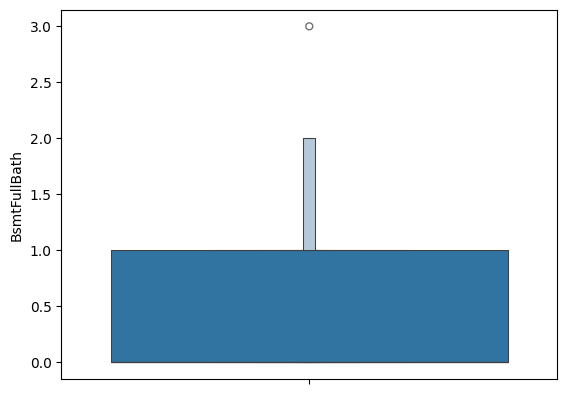

In [151]:
sns.boxenplot(datasetTrain['BsmtFullBath'])

In [152]:
dataset_Test['BsmtFinSF1'] = dataset_Test['BsmtFinSF1'].fillna(dataset_Test['BsmtFinSF1'].median())
dataset_Test['BsmtFinSF2'] = dataset_Test['BsmtFinSF2'].fillna(dataset_Test['BsmtFinSF2'].median())
dataset_Test['BsmtUnfSF'] = dataset_Test['BsmtUnfSF'].fillna(dataset_Test['BsmtUnfSF'].median())
dataset_Test['TotalBsmtSF'] = dataset_Test['TotalBsmtSF'].fillna(dataset_Test['TotalBsmtSF'].median())
dataset_Test['BsmtFullBath'] = dataset_Test['BsmtFullBath'].fillna(dataset_Test['BsmtFullBath'].median())
dataset_Test['BsmtHalfBath'] = dataset_Test['BsmtHalfBath'].fillna(dataset_Test['BsmtHalfBath'].median())
dataset_Test['GarageArea'] = dataset_Test['GarageArea'].fillna(dataset_Test['GarageArea'].median())
dataset_Test['GarageCars'] = dataset_Test['GarageCars'].fillna(dataset_Test['GarageCars'].median())

<Axes: >

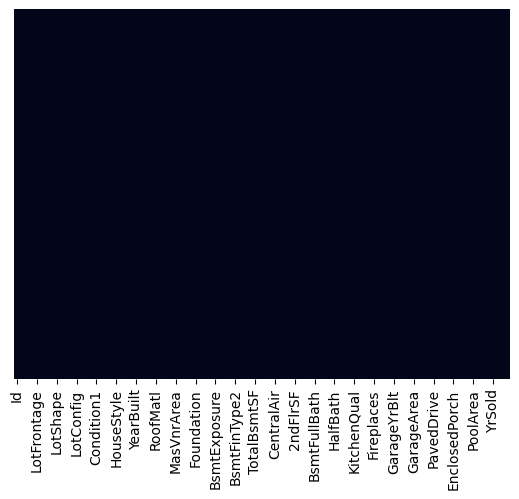

In [153]:
sns.heatmap(dataset_Test.isnull(),yticklabels=False,cbar=False)

<Axes: >

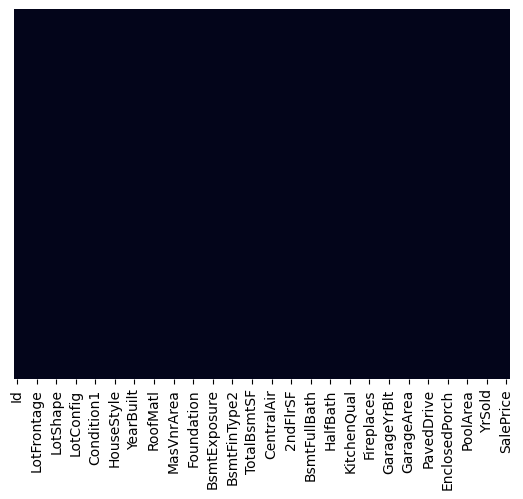

In [154]:
sns.heatmap(datasetTrain.isnull(),yticklabels=False,cbar=False)

smtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2

# Convert the string value numeric value via following Encoding methods
# Label Encoding
# One Hot Encoding

In [155]:
## One hot encoding
categorgocalfeatureTrain = [feature for feature in datasetTrain if datasetTrain[feature].dtype== 'O']
categorgocalfeatureTrain

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [156]:
## One hot encoding
categorgocalfeatureTest = [feature for feature in dataset_Test if dataset_Test[feature].dtype== 'O']
categorgocalfeatureTest

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [157]:
datasetTrain = pd.get_dummies(datasetTrain, columns= ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition'], drop_first= True)

In [158]:
dataset_Test = pd.get_dummies(dataset_Test, columns= ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition'], drop_first= True)

In [159]:
dataset_Test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,False,True,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,False,True,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,False,True,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,False,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,False,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,False,True,False,False,False,True,False


In [160]:
datasetTrain

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,0.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,108.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,0.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,20.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,0.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,0.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,94.0,49,...,False,False,False,False,True,False,False,False,True,False
